Version 1.5
Timestamp: 10/2/2022 2:55 PM

# *Imports, Version Checking and Defines**

Important:

There may be errors due to missing libraries. The import statements shown below are the only libraries needed to run . Preferably install the latest version.

An error may show up stating: 
"Mine type rendering requires nbformat >= 4.2.0 but it is not installed".

To fix this refer to the guide in this [link](https://stackoverflow.com/questions/66557543/valueerror-mime-type-rendering-requires-nbformat-4-2-0-but-it-is-not-installed)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as skl 
import scipy as sp
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pylab as py

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
print("Matplotlib: ", matplotlib.__version__)
print("Numpy: ", np.__version__)
print("Pandas: ", pd.__version__)
print("Scipy: ", sp.__version__)
print("Seaborn: ", sns.__version__)
print("Sklearn: ", skl.__version__)

Matplotlib:  3.5.1
Numpy:  1.21.5
Pandas:  1.4.2
Scipy:  1.7.3
Seaborn:  0.11.2
Sklearn:  1.0.2


In [3]:
# Define global constants here
DROP_THRESHOLD_PERCENTAGE = 0.8
SENTINEL_VALUE = -1

# Preliminaries

## **Dataset Description**

The group selected the **Human Freedom Index Dataset** from [here](https://www.kaggle.com/datasets/gsutters/the-human-freedom-index?select=hfi_cc_2021.csv&fbclid=IwAR3GXs5htrzwaI54899jt0LvaduYxECHJO3uEMx00e00i9Mh0GSRxluOwL0). 

The dataset consists of records of measurements of personal, civil, and economic freedom of various nations taken at different years.

In [4]:
# Run the following code if we're running on Google Collab. Otherwise, just comment it out.
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Assumed file structure
# - My Drive
# | - data folder
# | - hfi_cc_2021.csv
hfi_dataset = pd.read_csv('hfi_cc_2021.csv')
hfi_dataset.head()

year  countries  ISO                         region  hf_score  hf_rank  \
0  2019    Albania  ALB                 Eastern Europe      8.14     43.0   
1  2019    Algeria  DZA     Middle East & North Africa      5.26    154.0   
2  2019     Angola  AGO             Sub-Saharan Africa      6.09    129.0   
3  2019  Argentina  ARG  Latin America & the Caribbean      7.38     74.0   
4  2019    Armenia  ARM        Caucasus & Central Asia      8.20     40.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
0          2.0               5.97          4.76             4.26  ...   
1          4.0               5.21          5.64             4.35  ...   
2          4.0               2.72          4.43             3.60  ...   
3          2.0               6.83          5.94             4.35  ...   
4          1.0                NaN           NaN              NaN  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                        5.65                                6.67   
1                        4.22                                2.22   
2                        2.94                                2.44   
3                        2.71                                5.78   
4                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 125 columns]

In [6]:
hfi_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 125 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    year                                int64  
 1    countries                           object 
 2    ISO                                 object 
 3    region                              object 
 4    hf_score                            float64
 5    hf_rank                             float64
 6    hf_quartile                         float64
 7    pf_rol_procedural                   float64
 8    pf_rol_civil                        float64
 9    pf_rol_criminal                     float64
 10   pf_rol                              float64
 11   pf_ss_homicide                      float64
 12   pf_ss_disappearances_disap          float64
 13   pf_ss_disappearances_violent        float64
 14   pf_ss_disappearances_organized      float64
 15   pf_ss_disappearances_fatalities     

In [7]:
hfi_dataset.shape

(1980, 125)

## ***Variables***


---


The following variables were selected from the dataset. The extensive descriptions for each variable can be found in [this study](https://www.cato.org/sites/cato.org/files/2022-03/human-freedom-index-2021-updated.pdf), but they have been summarized into the following list:

Note that for each of the measurements of personal freedom and economic freedom (prefixed with pf and ef respectively), a higher rating is indicative of more freedoms.

*   **year**: The year in which the record was taken. 
*   **countries**: The name of the country.
*   **region**: The region that the country is a part of (i.e. Eastern Europe).
*   **hf_score**: The overall Human Freedom rating of the country. 
*   **pf_rol**: A rating for the extent of the rule of law in the country.  
*   **pf_ss_killings**: A rating for the amount of crimes committed (in particular, homicides).
*   **pf_ss_disappearances**: A rating for the amount of disappearances, battle-related deaths per capita, and level of organized conflict.
*   **pf_movement**: The average rating of citizen's freedom of movement within the country, taking into account freedom to emigrate, freedom of residence, and the freedoms of men and women to move.
*   **pf_religion_freedom**: The average rating of the extent of religious freedom in the country.
*   **pf_assembly_entry**: A rating of the freedom of civil organizations to enter and exit public life.
*   **pf_assembly_freedom**: A rating of the freedom of assembly, including the freedom to carry out peaceful protests.
*   **pf_expression_cultural**: A rating of the cultural expression, including academic expression.
*   **pf_expression_gov**: A rating for the government attempts to censor print and broadcast media (government censorship efforts).
*   **pf_expression_internet**: A rating for government censorship on the internet.
*   **pf_expression_selfcens**: A rating of the degreee to which journalists censor themselves on politically sensitive issues.
*   **pf_expression_freedom**: A rating for a range of issues including: extent of journalists and press censorship, the use of laws to punish journalists, and other laws that influence media content.
*   **ef_government_consumption**: A rating of government consumption.
*   **ef_government_transfers**: A rating of governemnt transfers and subsidies.
*   **ef_government_enterprises**: A rating of government investment.
*   **ef_government_soa**: A rating of state ownership of assets. An increase in this and last factor decreases economic freedom because it "crows out individual choice."
*   **ef_legal_judicial**: A rating of judicial independence.
*   **ef_legal_courts**: A rating of impartial courts.
*   **ef_legal_protection**: A rating of protection of people and their property rights. It is dependent on judicial independence, impartial courts, and the legal enforcement of contracts.
*   **ef_legal_military**: A rating of military interference in rule of law and politics.
*   **ef_legal_integrity**: A rating of the integrity of the legal system.
*   **ef_legal_enforcement**: A rating of the legal enforcement of contracts.
*   **ef_legal_regulatory**: A rating of the legal enforcement of contracts.
*   **ef_legal_police**: A rating of the reliability of the police.
*   **ef_money_growth**: A rating of money growth.
*   **ef_money_sd**: A rating of the standard deviation of inflation.
*   **ef_money_inflation**: A rating of the inflation in the most recent years.
*   **ef_money_currency**: A rating of the freedom to own foreign currency in bank accounts.
*   **ef_trade_tariffs_revenue**: A rating of the revenue from trade taxes (% of trade sector).
*   **ef_trade_tariffs_mean**: A rating of the tariff rate mean.
*   **ef_trade_tariffs_sd**: A rating of the standard deviation of tariff rates.
*   **ef_trade_regulatory_nontariff**: A rating for how much non-tariff trades are regulated.
*   **ef_trade_regulatory_compliance**: A rating for how much compliance-related regulations are in place.
*   **ef_trade_black**: A rating of  black market exchange rates.
*   **ef_trade_movement_foreign**: A rating of financial openness.
*   **ef_trade_movement_capital**: A rating of capital controls.
*   **ef_trade_movement_visit**: A rating of freedom of foreigners to visit.
*   **ef_regulation_credit_ownership**: A rating of credit ownership of banks.
*   **ef_regulation_credit_private**: A rating of the private-sectors credit.
*   **ef_regulation_credit_interest**: A rating of the interest rate controls/negative real interest rates.
*   **ef_regulation_labor_minwage**: A rating of labor market regulations for hiring regulations and minimum wage.
*   **ef_regulation_labor_firing**: A rating of labor market regulations for hiring and firing regulations.
*   **ef_regulation_labor_bargain**: A rating for how easy it is for laborers to bargain for increased wages.
*   **ef_regulation_labor_hours**: A rating of labor market regulations for hours regulation.
*   **ef_regulation_labor_dismissal**: A rating of labor market regulations for mandated cost of worker dismissal.
*   **ef_regulation_labor_conscription**: A rating of labor market regulations for conscription.
*   **ef_regulation_business_adm**: A rating of business regulation for administrative requirements.
*   **ef_regulation_business_bureaucracy**: A rating of business regulation for bureaucracy costs.
*   **ef_regulation_business_start**: A rating of business regulation for starting a business.
*   **ef_regulation_business_bribes**: A rating of business regulation for impartial public administration.
*   **ef_regulation_business_licensing**: A rating of business regulation for licensing restrictions.
*   **ef_regulation_business_compliance**: A rating of business regulation for cost of tax compliance.






## **Data Collection Methods**

The data were collected from various indices and databases.

All of the personal freedom subfactors (prefixed with pf) are taken from qualitative queries mapped to ordinal values. These values are then averaged across the surveyed population. The bin values do not necessarily range from 0 to 10, hence they have been multiplied by a scaling factor for normalization purposes. 

For economic freedom subfactors (prefixed with ef), these are taken from various statistics. The dataset is then normalized using the range in such a way that for a given subfactor, the country with the lowest value of that subfactor is given a rating of 0, and the country with the highest a rating of 10.

Some subfactors are averages of averages of data collected from different datasets and studies. If one study does not have a record for a particular country at a particular year, then the data from the other subfactor was chosen. 


## **Observtions, Implications and Considerations** 
The personal and economic freedom subfactors have values that range from 0 - 10, with high values corresponding to more human freedoms. The relatively small range also means that normalization during the data cleaning process is unnecessary.

Because the data were obtained from various other datasets, it is important to remember that the data is not "raw" in the sense that it does not consist of actual responses to the surveys that were conducted. Rather, the data mostly consist of averages for the various subfactors. More specifically, they are sample means that act as point estimators rather than exact values.

Another thing to remember is that the data have been compiled from various sources. For subfactors that were obtained from one source (i.e., **pf_expression_internet** being obtained solely from the V-Dem dataset). This is not an issue with regards to formulating our conclusions since we can interpret these subfactors as having been the focal point of its own observational study.

For subfactors that have been compiled from multiple sources (such as pf_religion which takes its data from the V-Dem and CLD datasets), the value encoded was the average of the normalized values obtained from these datasets (i.e., it is the average of averages of datapoints). This method assumes that the sample sizes for the two studies that were conducted for the two datasets are equal, which is more than likely not the case. Thus, for certain subfactors we may have to do additional work in our analyses and cleaning. Additionally, it is important to realize that these subfactors may not be independent of each other. We will keep this in mind in our data cleaning.


# Data Cleaning

## Helper Functions

Let us define the following helper functions

In [8]:
# For our features that are supposed to be from 0 to 10.
def is_proper_index(frame):
  return frame.between(0, 10).sum() == frame.notnull().sum()

In [9]:
# For denormalizing dataframes.
def denormalizeFromMax(series, min, max, scale = 10):
  return series.apply(lambda x: max - x / 10 * (max - min))

def denormalizeFromMin(series, min, max, scale=10):
  return series.apply(lambda x: x / 10 * (max - min) + min)

In [10]:
# For determining whether or not there is a skew, and to impute based on an appropriate rule
def imputeBasedOnSkew(series : pd.Series):
  skew = series.skew()
  if (abs(skew) > 1):
    return series.fillna(series.median()) 
  else:
    return series.fillna(series.mean())

In [11]:
# For standardizing a column
def standardize(series : pd.Series):
  mean = series.mean()
  std = series.std()

  return series.apply(lambda x : (x - mean) / std)

## **Feature Filtering**
We create a new dataset with only our desired features. Begin by making a series of lists that contain the names of our features. This will make it easier to index everything.

In [12]:
primary_key_features = ['year', 'countries', 'region']
hf_score = ['hf_score']


In [13]:
#pf
pf_rol = ['pf_rol']
pf_ss = ['pf_ss_killings', 'pf_ss_disappearances']
pf_movement = ['pf_movement']
pf_religion_freedom = ['pf_religion_freedom']
pf_assembly = ['pf_assembly_entry', 'pf_assembly_freedom']
pf_expression = ['pf_expression_cultural', 'pf_expression_gov', 'pf_expression_internet',
                 'pf_expression_selfcens', 'pf_expression_freedom']

pf_features = pf_rol + pf_ss + pf_movement + pf_religion_freedom + pf_assembly + pf_expression

In [14]:
#ef
ef_government = ['ef_government_consumption', 'ef_government_transfers', 
                 'ef_government_enterprises', 'ef_government_soa' ]
ef_legal = ['ef_legal_judicial', 'ef_legal_courts', 'ef_legal_protection',
            'ef_legal_military', 'ef_legal_integrity', 'ef_legal_enforcement',
            'ef_legal_regulatory', 'ef_legal_police']
ef_money = ['ef_money_growth', 'ef_money_sd', 'ef_money_inflation', 'ef_money_currency']

ef_trade_tariffs = ['ef_trade_tariffs_revenue', 'ef_trade_tariffs_mean', 'ef_trade_tariffs_sd']
ef_trade_movement = ['ef_trade_movement_foreign', 'ef_trade_movement_capital', 'ef_trade_movement_visit']
ef_trade = ['ef_trade_regulatory_nontariff', 'ef_trade_regulatory_compliance', 'ef_trade_black'] + ef_trade_tariffs + ef_trade_movement

ef_regulation_credit = ['ef_regulation_credit_ownership', 
                        'ef_regulation_credit_private',
                        'ef_regulation_credit_interest']
ef_regulation_labor = ['ef_regulation_labor_minwage',
                      'ef_regulation_labor_firing',
                      'ef_regulation_labor_bargain',
                      'ef_regulation_labor_hours',
                      'ef_regulation_labor_dismissal',
                      'ef_regulation_labor_conscription']
ef_regulation_business = ['ef_regulation_business_adm',
                          'ef_regulation_business_bureaucracy',
                          'ef_regulation_business_start',
                          'ef_regulation_business_bribes',
                          'ef_regulation_business_licensing',
                          'ef_regulation_business_compliance']
ef_regulation = ef_regulation_credit + ef_regulation_labor + ef_regulation_business

ef_features = ef_government + ef_legal + ef_money + ef_trade + ef_regulation

In [15]:
kept_features = primary_key_features + hf_score + pf_features + ef_features

### Cleaning the primary key fetures (year, country, region) and hf_score

We start with the primary key features and the **hf_score**. 

For **year**, **country**, and **region**, the values may repeat. However, we have these constraints that must be asserted as true:
1. The tuple (**year**, country) is unique.
2. The **region** is consistent for each country. 

We also verify that every observation has an entry for the **hf_score** feature.

#### Checking for empty records
Let us assert that there are no missing records for **year**, **country**, **region**, and **hf_score**. As shown below, this is indeed the case for all but **hf_score**.

In [16]:
hfi_dataset[primary_key_features + hf_score].isnull().sum()

year           0
countries      0
region         0
hf_score     113
dtype: int64

We investigate the records with no **hf_score**. Let us also check how many of the entries they have as NaN. We hypothesize that these are records with little to no data so let us drop them if they have too few records for the subfactors (at least 80%), which we can verify by performing a dropna and seeing how many got dropped.

In [17]:
test = hfi_dataset.loc[hfi_dataset['hf_score'].isnull()]
test.shape

(113, 125)

In [18]:
test = test.dropna(subset=kept_features, thresh=int(DROP_THRESHOLD_PERCENTAGE * len(kept_features)))
test.shape

(0, 125)

As was shown, all the data from the subset got dropped. We can therefore omit these entries in our dataset.

In [19]:
hfi_dataset.dropna(subset=hf_score, inplace=True)
hfi_dataset.shape

(1867, 125)

#### **Asserting Correct values**
We now assert correct representation, and that (**year**, **country**) is unique, and that **region** corresponds to the correct **country**. Let us start by checking for spelling mistakes or double encodings for **year**, **country**, and **region**.

In [20]:
# year. As we can see, the range of values are 2008 - 2019.
hfi_dataset['year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008], dtype=int64)

In [21]:
# countries. Visual investigation shows that there are no misspellings, and they follow a consistent format.
hfi_dataset['countries'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR, China', 'Hungary',
       'Iceland', 'India', 'I

In [22]:
# region. Visual investigation shows that there are no misspellings and they follow a consistent format.
hfi_dataset['region'].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [23]:
# Now we verify our first assertion, that year and country pairs are unique. To do this, let us create a new list, consisting of just the concatenation possible.
# Let's start with (year, country). Since this must be unique, we check if the length of the new series is the same as the length of our dataframe.

tmp = pd.Series([str(year) + str(countries) for (year, countries) in hfi_dataset[['year', 'countries']].values])
if (len(tmp) == hfi_dataset.shape[0]):
  print("No duplicates")

No duplicates


In [24]:
# We use a different approach for (country, region). We get a notification if country and region pairs are inconsistent.

tmp = [(countries, region) for (countries, region) in hfi_dataset[['countries', 'region']].values]
kvp = {}

for (c, r) in tmp:
  if c in kvp and kvp[c] != r:
    print("Requires cleaning")
    break
  kvp[c] = r

After this we have successfully cleaned the primary keys and the **hf_index** features. 

##### **Important Note**:
There are technically missing entries (excluding those that were a result of us dropping entries from earlier). The missing entries pertain to those nonexistent records of a country at a particular year. We opt not to clean this up as the need depends more on the research problem (for example if we are doing a time series analysis on the hf_score). 

If there is a need to clean it, it will be done in the preprocessing stage of the modelling phase. The way to do it is to simply choose our countries with complete (or majority complete) records. 

In [25]:
hfi_dataset["year"].value_counts()

2019    165
2018    162
2017    162
2016    162
2015    159
2014    159
2013    157
2012    153
2011    153
2010    153
2009    141
2008    141
Name: year, dtype: int64

### Cleaning the personal freedom features

Since these features are numerical, there is no need to check for duplicates, and as mentioned the data has already been normalized to be in the range 0 to 10. We just need to verify that this is indeed the case.

For the most part we will be checking for null entries. We do not need to worry about incorrect dtypes since running .info() on the dataset reveals that all factors (excluding ranks) are in float64.

We will be doing imputation using the following criterion. If the skewness (determined by .skew()) is < -1 or > 1, we use the median. Otherwise we use the mean.

#### **pf_rol**


Let us begin by verifying the range of values is from 0 to 10

In [26]:
is_proper_index(hfi_dataset['pf_rol'])

True

We check for missing records and fill them accordingly. Based on the result below, there are no missing records. However, we know that **pf_rol** is dependent on three other features, **pf_rol_procedural**, **pf_rol_civil**, and **pf_rol_criminal**. We may not be having missing values in **pf_rol** because we do not have any entries for these three features.

In [27]:
hfi_dataset[pf_rol].isnull().sum()

pf_rol    0
dtype: int64

In [28]:
hfi_dataset[['pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal']].isnull().sum()

pf_rol_procedural    636
pf_rol_civil         636
pf_rol_criminal      636
dtype: int64

Let's verify that the set of 636 entries from each of the three features is the same set.

In [29]:
rol_procedural = hfi_dataset[hfi_dataset['pf_rol_procedural'].isnull()]
rol_civil = hfi_dataset[hfi_dataset['pf_rol_civil'].isnull()]
rol_criminal = hfi_dataset[hfi_dataset['pf_rol_criminal'].isnull()]

print(rol_procedural.equals(rol_civil))
print(rol_procedural.equals(rol_criminal))
print(rol_criminal.equals(rol_civil))

True
True
True


Indeed, the set of entries are one and the same. We cannot afford to drop these entries so let us impute based on skew.

In [30]:
hfi_dataset['pf_rol'] = imputeBasedOnSkew(hfi_dataset['pf_rol'])
print(hfi_dataset[pf_rol].isnull().sum())
hfi_dataset.shape

pf_rol    0
dtype: int64


(1867, 125)

#### **pf_ss**



We begin by verifying that the series are in range.

In [31]:
is_proper_index(hfi_dataset['pf_ss_killings']) and \
is_proper_index(hfi_dataset['pf_ss_disappearances'])

True

We now proceed to the data in **pf_ss**. Let us check for null values. Running the code below shows there are null values in **pf_ss_killings**.

In [32]:
hfi_dataset[pf_ss].isnull().sum()

pf_ss_killings          34
pf_ss_disappearances     0
dtype: int64

\We can populate the missing values using our imputation method on the skew.

In [33]:
hfi_dataset['pf_ss_killings'] = imputeBasedOnSkew(hfi_dataset['pf_ss_killings'])
print(hfi_dataset[pf_rol].isnull().sum())
hfi_dataset.shape

pf_rol    0
dtype: int64


(1867, 125)

#### **pf_movement**


We now proceed to the data in **pf_movement**. Let us check for null values. 

In [34]:
hfi_dataset[pf_movement].isnull().sum()

pf_movement    0
dtype: int64

Again, let us check the variables which **pf_movement** depends on



In [35]:
pf_movement_subfactors = ['pf_movement_vdem', 'pf_movement_cld']
hfi_dataset[pf_movement_subfactors].isnull().sum()

pf_movement_vdem    34
pf_movement_cld     12
dtype: int64

As was discussed, we ought to just select from one dataset for each record. Thus, let us choose the CLD dataset since it has the most records and populate the empty records with the VDem dataset. We then verify that no records are empty.

In [36]:
hfi_dataset['pf_movement'] = hfi_dataset['pf_movement_cld']
hfi_dataset['pf_movement'] = hfi_dataset['pf_movement'].fillna(hfi_dataset['pf_movement_vdem'])

print(hfi_dataset[pf_movement].isnull().sum())
print(hfi_dataset.shape)
print(is_proper_index(hfi_dataset['pf_movement']))

pf_movement    0
dtype: int64
(1867, 125)
True


#### **pf_religion_freedom**

We now proceed to the data in **pf_religion_freedom**. Let us check for null values. 

In [37]:
hfi_dataset[pf_religion_freedom].isnull().sum()

pf_religion_freedom    0
dtype: int64

Again, let us check the variables which **pf_religion_freedom** depends on 

In [38]:
pf_religion_freedom_subfactors = ['pf_religion_freedom_vdem', 'pf_religion_freedom_cld']
hfi_dataset[pf_religion_freedom_subfactors].isnull().sum()

pf_religion_freedom_vdem    34
pf_religion_freedom_cld     12
dtype: int64

As was discussed, we ought to just select from one dataset for each record. Thus, let us choose the CLD dataset since it has the most records and populate the empty records with the VDem dataset. We then verify that no records are empty.

In [39]:
hfi_dataset['pf_religion_freedom'] = hfi_dataset['pf_religion_freedom_cld']
hfi_dataset['pf_religion_freedom'] = hfi_dataset['pf_religion_freedom'].fillna(hfi_dataset['pf_religion_freedom_vdem'])

print(hfi_dataset[pf_religion_freedom].isnull().sum())
print(hfi_dataset.shape)
print(is_proper_index(hfi_dataset['pf_religion_freedom']))

pf_religion_freedom    0
dtype: int64
(1867, 125)
True


#### **pf_assembly**

We now proceed to the clean data in **pf_assembly**. Let us check for null values.


In [40]:
hfi_dataset[pf_assembly].isnull().sum()

pf_assembly_entry      34
pf_assembly_freedom     0
dtype: int64

Now, **pf_assembly_freedom** is dependent on three datasets. We can examine these in more detail.

In [41]:
pf_assembly_freedom_subfactors = ['pf_assembly_freedom_house', 'pf_assembly_freedom_bti', 'pf_assembly_freedom_cld']
hfi_dataset[pf_assembly_freedom_subfactors].isnull().sum()

pf_assembly_freedom_house      0
pf_assembly_freedom_bti      483
pf_assembly_freedom_cld       12
dtype: int64

It appears that **pf_assembly_freedom_house** has no null entries. We can simply use this as the value of **pf_asembly_freedom**

In [42]:
hfi_dataset['pf_assembly_freedom'] = hfi_dataset['pf_assembly_freedom_house']


We also impute for the missing entries in **pf_assembly_entry**

In [43]:
hfi_dataset['pf_assembly_entry'] = imputeBasedOnSkew(hfi_dataset['pf_assembly_entry'])

In [44]:
print(hfi_dataset[pf_assembly].isnull().sum())
print(hfi_dataset.shape)
print(is_proper_index(hfi_dataset['pf_assembly_freedom']))

pf_assembly_entry      0
pf_assembly_freedom    0
dtype: int64
(1867, 125)
True


#### **pf_expression**


We now proceed to clean the data in **pf_expression**. Let us check for null values.


In [45]:
hfi_dataset[pf_expression].isnull().sum()

pf_expression_cultural    34
pf_expression_gov         34
pf_expression_internet    34
pf_expression_selfcens    34
pf_expression_freedom     12
dtype: int64

Before we proceed, let us verify they are all valid indices.

In [46]:
is_proper_index(hfi_dataset['pf_expression_cultural']) and \
is_proper_index(hfi_dataset['pf_expression_gov']) and \
is_proper_index(hfi_dataset['pf_expression_internet']) and \
is_proper_index(hfi_dataset['pf_expression_selfcens']) and \
is_proper_index(hfi_dataset['pf_expression_freedom']) 

True

Since we do not have an extra dataset for these, let us perform imputation. We examine each distribution and determine the appropriate value to use for imputation. We use the mean if the distribution is symmetric, and the median otherwise.

In [47]:
hfi_dataset['pf_expression_cultural'] = imputeBasedOnSkew(hfi_dataset['pf_expression_cultural'])
hfi_dataset['pf_expression_gov'] = imputeBasedOnSkew(hfi_dataset['pf_expression_gov'])
hfi_dataset['pf_expression_internet'] = imputeBasedOnSkew(hfi_dataset['pf_expression_internet'])
hfi_dataset['pf_expression_selfcens'] = imputeBasedOnSkew(hfi_dataset['pf_expression_selfcens'])
hfi_dataset['pf_expression_freedom'] = imputeBasedOnSkew(hfi_dataset['pf_expression_freedom'])

In [48]:
hfi_dataset[pf_expression].isnull().sum()

pf_expression_cultural    0
pf_expression_gov         0
pf_expression_internet    0
pf_expression_selfcens    0
pf_expression_freedom     0
dtype: int64

### **Cleaning the economic freedom features**

Since these features are numerical, there is no need to check for duplicates, and as mentioned the data has already been normalized (albeit using the range rather than the stddev).

For the most part we will be checking for null entries. We do not need to worry about incorrect dtypes since running .info() on the dataset reveals that all factors (excluding ranks) are in float64.

As before, our imputation shall be based on the skew of the dataset. 

#### **ef_government**

We now proceed to clean the data in **ef_government**. We check for empty values.

In [49]:
hfi_dataset[ef_government].isnull().sum()

ef_government_consumption     0
ef_government_transfers      94
ef_government_enterprises    98
ef_government_soa            34
dtype: int64

Let us check for valid indices

In [50]:
is_proper_index(hfi_dataset['ef_government_consumption']) and \
is_proper_index(hfi_dataset['ef_government_transfers']) and \
is_proper_index(hfi_dataset['ef_government_enterprises']) and \
is_proper_index(hfi_dataset['ef_government_soa']) 

True

We now proceed to denormalize the data for each feature in order to reduce the possibility of outliers when analyzing the data.

In [51]:
hfi_dataset['ef_government_consumption'] = denormalizeFromMax(hfi_dataset['ef_government_consumption'], 6, 40)
hfi_dataset['ef_government_transfers'] = denormalizeFromMax(hfi_dataset['ef_government_transfers'], 0.5, 37.2)
hfi_dataset['ef_government_enterprises'] = denormalizeFromMax(hfi_dataset['ef_government_enterprises'], 15, 50)
hfi_dataset['ef_government_soa'] = denormalizeFromMin(hfi_dataset['ef_government_soa'], 0, 4)

In [52]:
hfi_dataset[ef_government].agg({"min", "max"})

ef_government_consumption  ef_government_transfers  \
min                        6.0                   0.5000   
max                       40.0                  30.0802   

     ef_government_enterprises  ef_government_soa  
min                       15.0              1.008  
max                       50.0              3.748

Let us perform imputation

In [53]:
hfi_dataset['ef_government_consumption'] =imputeBasedOnSkew(hfi_dataset['ef_government_consumption'])
hfi_dataset['ef_government_transfers'] =imputeBasedOnSkew(hfi_dataset['ef_government_transfers']) 
hfi_dataset['ef_government_enterprises'] =imputeBasedOnSkew(hfi_dataset['ef_government_enterprises'])
hfi_dataset['ef_government_soa'] =imputeBasedOnSkew(hfi_dataset['ef_government_soa'])
hfi_dataset[ef_government].isnull().sum()

ef_government_consumption    0
ef_government_transfers      0
ef_government_enterprises    0
ef_government_soa            0
dtype: int64

#### **ef_legal**


We now proceed to clean the data in **ef_legal**. We check for empty values.

In [54]:
hfi_dataset[ef_legal].isnull().sum()

ef_legal_judicial         0
ef_legal_courts           0
ef_legal_protection      13
ef_legal_military       175
ef_legal_integrity        5
ef_legal_enforcement      0
ef_legal_regulatory       9
ef_legal_police          29
dtype: int64

Let us check if they are valid indices

In [55]:
is_proper_index(hfi_dataset['ef_legal_judicial']) and \
is_proper_index(hfi_dataset['ef_legal_courts']) and \
is_proper_index(hfi_dataset['ef_legal_protection']) and \
is_proper_index(hfi_dataset['ef_legal_military']) and \
is_proper_index(hfi_dataset['ef_legal_integrity']) and \
is_proper_index(hfi_dataset['ef_legal_enforcement']) and \
is_proper_index(hfi_dataset['ef_legal_regulatory']) and \
is_proper_index(hfi_dataset['ef_legal_police'])

True

We no longer perform denormalization for most of these variables since they are the result of aggregation with multiple datasets, whose raw values were not provided. The only exception is **ef_legal_police** which has values for Xmax and Xmin

In [56]:
hfi_dataset['ef_legal_police'] = denormalizeFromMax(hfi_dataset['ef_legal_police'], 0, 7)
hfi_dataset['ef_legal_police'].agg({'min', 'max'})

min    0.217
max    7.000
Name: ef_legal_police, dtype: float64

In [57]:
for x in ef_legal:
  hfi_dataset[x] = imputeBasedOnSkew(hfi_dataset[x])

hfi_dataset[ef_legal].isnull().sum()

ef_legal_judicial       0
ef_legal_courts         0
ef_legal_protection     0
ef_legal_military       0
ef_legal_integrity      0
ef_legal_enforcement    0
ef_legal_regulatory     0
ef_legal_police         0
dtype: int64

#### **ef_money**

We now proceed to clean the data in **ef_money**. We check for empty values.


In [58]:
hfi_dataset[ef_money].isnull().sum()

ef_money_growth       2
ef_money_sd           0
ef_money_inflation    0
ef_money_currency     0
dtype: int64

Let us check if they are valid indices


In [59]:
is_proper_index(hfi_dataset['ef_money_growth']) and \
is_proper_index(hfi_dataset['ef_money_sd']) and \
is_proper_index(hfi_dataset['ef_money_inflation']) and \
is_proper_index(hfi_dataset['ef_money_currency'])

True

Then let us perform denormalization.

Note: we do not perform denormalization on **ef_money_currency** since it is simply encoding discrete responses into a normalized scale.

In [60]:
hfi_dataset['ef_money_growth'] = denormalizeFromMax(hfi_dataset['ef_money_growth'], 0, 50)
hfi_dataset['ef_money_sd'] = denormalizeFromMax(hfi_dataset['ef_money_sd'], 0, 25)
hfi_dataset['ef_money_inflation'] = denormalizeFromMax(hfi_dataset['ef_money_inflation'], 0, 50)

In [61]:
hfi_dataset[ef_money].agg({"max", "min"})

ef_money_growth  ef_money_sd  ef_money_inflation  ef_money_currency
min              0.0        0.125                 0.0                0.0
max             50.0       25.000                50.0               10.0

Then let us impute in accordance to the skew of the respective distributions.

In [62]:
for x in ef_money:
  hfi_dataset[x] = imputeBasedOnSkew(hfi_dataset[x])

hfi_dataset[ef_money].isnull().sum()

ef_money_growth       0
ef_money_sd           0
ef_money_inflation    0
ef_money_currency     0
dtype: int64

#### **ef_trade**

We now proceed to clean the data in **ef_trade**. We check for empty values.


In [63]:
hfi_dataset[ef_trade].isnull().sum()

ef_trade_regulatory_nontariff     100
ef_trade_regulatory_compliance     12
ef_trade_black                      7
ef_trade_tariffs_revenue           99
ef_trade_tariffs_mean              19
ef_trade_tariffs_sd                18
ef_trade_movement_foreign          79
ef_trade_movement_capital          12
ef_trade_movement_visit             8
dtype: int64

Let us check if they are valid indices


In [64]:
is_proper_index(hfi_dataset['ef_trade_regulatory_nontariff']) and \
is_proper_index(hfi_dataset['ef_trade_regulatory_compliance']) and \
is_proper_index(hfi_dataset['ef_trade_black']) and \
is_proper_index(hfi_dataset['ef_trade_tariffs_revenue']) and \
is_proper_index(hfi_dataset['ef_trade_tariffs_mean']) and \
is_proper_index(hfi_dataset['ef_trade_tariffs_sd']) and \
is_proper_index(hfi_dataset['ef_trade_movement_foreign']) and \
is_proper_index(hfi_dataset['ef_trade_movement_capital']) and \
is_proper_index(hfi_dataset['ef_trade_movement_visit'])

True

We perform denormalization.

Note: 
**ef_trade_regulatory_compliance** is a trimmed mean that has been normalized already. Since the raw data is unavailable for us to infer the ranges of each parameter of this variable, we cannot denormalize.

In [65]:
hfi_dataset['ef_trade_tariffs_revenue'] = denormalizeFromMax(hfi_dataset['ef_trade_tariffs_revenue'], 0, 15)
hfi_dataset['ef_trade_tariffs_mean'] = denormalizeFromMax(hfi_dataset['ef_trade_tariffs_mean'], 0, 50)
hfi_dataset['ef_trade_tariffs_sd'] = denormalizeFromMax(hfi_dataset['ef_trade_tariffs_sd'], 0, 25)
hfi_dataset['ef_trade_regulatory_nontariff'] = denormalizeFromMax(hfi_dataset['ef_trade_regulatory_nontariff'], 1, 7)
hfi_dataset['ef_trade_black'] = denormalizeFromMax(hfi_dataset['ef_trade_black'], 0, 50)
hfi_dataset['ef_trade_movement_foreign'] = denormalizeFromMax(hfi_dataset['ef_trade_movement_foreign'], 0, 1)
hfi_dataset['ef_trade_movement_capital'] = denormalizeFromMax(hfi_dataset['ef_trade_movement_capital'], 0, 1)
hfi_dataset['ef_trade_movement_visit'] = denormalizeFromMin(hfi_dataset['ef_trade_movement_visit'], 0, 47.2)

hfi_dataset[ef_trade].agg({'min', 'max'})


ef_trade_regulatory_nontariff  ef_trade_regulatory_compliance  \
min                          1.486                             0.0   
max                          7.000                            10.0   

     ef_trade_black  ef_trade_tariffs_revenue  ef_trade_tariffs_mean  \
min             0.0                       0.0                    0.0   
max            50.0                      15.0                   35.9   

     ef_trade_tariffs_sd  ef_trade_movement_foreign  \
min                  0.0                        0.0   
max                 25.0                        1.0   

     ef_trade_movement_capital  ef_trade_movement_visit  
min                        0.0                      0.0  
max                        1.0                     47.2

Let us then address the null values

In [66]:
for x in ef_trade:
  hfi_dataset[x] = imputeBasedOnSkew(hfi_dataset[x])
  
hfi_dataset[ef_trade].isnull().sum()

ef_trade_regulatory_nontariff     0
ef_trade_regulatory_compliance    0
ef_trade_black                    0
ef_trade_tariffs_revenue          0
ef_trade_tariffs_mean             0
ef_trade_tariffs_sd               0
ef_trade_movement_foreign         0
ef_trade_movement_capital         0
ef_trade_movement_visit           0
dtype: int64

#### **ef_regulation_credit**

We now proceed to clean the data in **ef_regulation_credit**. We check for empty values.


In [67]:
hfi_dataset[ef_regulation_credit].isnull().sum()

ef_regulation_credit_ownership    105
ef_regulation_credit_private        2
ef_regulation_credit_interest      20
dtype: int64

Let us check if they are valid indices

In [68]:
is_proper_index(hfi_dataset['ef_regulation_credit_ownership']) and \
is_proper_index(hfi_dataset['ef_regulation_credit_private']) and \
is_proper_index(hfi_dataset['ef_regulation_credit_interest'])

True

**ef_regulation_credit_ownership**, and **ef_regulation_credi_interest** are categorical values denoting an observation falling into a particular bin. Hence, there is no ned to normalize.

Also, **ef_regulation_credit_private** is derived from two different datasets whose data are unavailable. Hence, there we cannot perform denormalization.

We perform imputation

In [69]:
for x in ef_regulation_credit:
  hfi_dataset[x] = imputeBasedOnSkew(hfi_dataset[x])
hfi_dataset[ef_regulation_credit].isnull().sum()

ef_regulation_credit_ownership    0
ef_regulation_credit_private      0
ef_regulation_credit_interest     0
dtype: int64

#### **ef_regulation_labor**

We now proceed to clean the data in **ef_regulation_labor**. We check for empty values.


In [70]:
hfi_dataset[ef_regulation_labor].isnull().sum()

ef_regulation_labor_minwage          11
ef_regulation_labor_firing          137
ef_regulation_labor_bargain         136
ef_regulation_labor_hours             8
ef_regulation_labor_dismissal        39
ef_regulation_labor_conscription      3
dtype: int64

Let us check if they are valid indices

In [71]:
is_proper_index(hfi_dataset['ef_regulation_labor_minwage']) and \
is_proper_index(hfi_dataset['ef_regulation_labor_firing']) and \
is_proper_index(hfi_dataset['ef_regulation_labor_bargain']) and \
is_proper_index(hfi_dataset['ef_regulation_labor_hours']) and \
is_proper_index(hfi_dataset['ef_regulation_labor_dismissal']) and \
is_proper_index(hfi_dataset['ef_regulation_labor_conscription'])

True

We perform denormalization. Note that the following are categorical variables which need not be denormalized:
**ef_regulation_labor_minwage**, **ef_regulation_labor_hours**, and **ef_regulation_conscription**

In [72]:
hfi_dataset['ef_regulation_labor_firing'] = denormalizeFromMax(hfi_dataset['ef_regulation_labor_firing'], 1, 7)
hfi_dataset['ef_regulation_labor_bargain'] = denormalizeFromMax(hfi_dataset['ef_regulation_labor_bargain'], 1, 7)
hfi_dataset['ef_regulation_labor_dismissal'] = denormalizeFromMax(hfi_dataset['ef_regulation_labor_dismissal'], 0, 58)

hfi_dataset[ef_regulation_labor].agg({'min', 'max'})

ef_regulation_labor_minwage  ef_regulation_labor_firing  \
min                          0.0                       1.894   
max                         10.0                       7.000   

     ef_regulation_labor_bargain  ef_regulation_labor_hours  \
min                          1.6                        2.0   
max                          7.0                       10.0   

     ef_regulation_labor_dismissal  ef_regulation_labor_conscription  
min                            0.0                               0.0  
max                           58.0                              10.0

Let us then address the null values

In [73]:
for x in ef_regulation_labor:
  hfi_dataset[x] = imputeBasedOnSkew(hfi_dataset[x])
hfi_dataset[ef_regulation_labor].isnull().sum()

ef_regulation_labor_minwage         0
ef_regulation_labor_firing          0
ef_regulation_labor_bargain         0
ef_regulation_labor_hours           0
ef_regulation_labor_dismissal       0
ef_regulation_labor_conscription    0
dtype: int64

#### **ef_regulation_business**

We now proceed to clean the data in **ef_regulation_business**. We check for empty values.


In [74]:
hfi_dataset[ef_regulation_business].isnull().sum()

ef_regulation_business_adm            135
ef_regulation_business_bureaucracy     42
ef_regulation_business_start           10
ef_regulation_business_bribes          34
ef_regulation_business_licensing       31
ef_regulation_business_compliance      14
dtype: int64

Let us check if they are valid indices

In [75]:
is_proper_index(hfi_dataset['ef_regulation_business_adm']) and \
is_proper_index(hfi_dataset['ef_regulation_business_bureaucracy']) and \
is_proper_index(hfi_dataset['ef_regulation_business_start']) and \
is_proper_index(hfi_dataset['ef_regulation_business_bribes']) and \
is_proper_index(hfi_dataset['ef_regulation_business_licensing']) and \
is_proper_index(hfi_dataset['ef_regulation_business_compliance'])

True

Let us perform denormalization.

Note: we do not do this for **ef_regulation_business_start** and **ef_regulation_business_licensing** since these are based on other variables not provided as raw data.

In [76]:
hfi_dataset['ef_regulation_business_adm'] = denormalizeFromMax(hfi_dataset['ef_regulation_business_adm'], 1, 7)
hfi_dataset['ef_regulation_business_bureaucracy'] = denormalizeFromMax(hfi_dataset['ef_regulation_business_bureaucracy'], 0.5, 5)
hfi_dataset['ef_regulation_business_bribes'] = denormalizeFromMin(hfi_dataset['ef_regulation_business_bribes'], 0, 4)
hfi_dataset['ef_regulation_business_compliance'] = denormalizeFromMax(hfi_dataset['ef_regulation_business_compliance'], 0, 892)

hfi_dataset[ef_regulation_business].agg({'min', 'max'})

ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
min                       2.386                                 0.5   
max                       7.000                                 5.0   

     ef_regulation_business_start  ef_regulation_business_bribes  \
min                          0.78                            0.0   
max                          9.98                            4.0   

     ef_regulation_business_licensing  ef_regulation_business_compliance  
min                               0.0                              6.244  
max                              10.0                            892.000

Let us then address the null values through imputation


In [77]:
for x in ef_regulation_business:
  hfi_dataset[x] = imputeBasedOnSkew(hfi_dataset[x])
  
hfi_dataset[ef_regulation_business].isnull().sum()

ef_regulation_business_adm            0
ef_regulation_business_bureaucracy    0
ef_regulation_business_start          0
ef_regulation_business_bribes         0
ef_regulation_business_licensing      0
ef_regulation_business_compliance     0
dtype: int64

## **Postprocessing**

Now that we have finished processing each feature, let us override hfi_dataset to be our processed dataset with only the features we want.

In [78]:
hfi_dataset = hfi_dataset[kept_features]
hfi_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1979
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                1867 non-null   int64  
 1   countries                           1867 non-null   object 
 2   region                              1867 non-null   object 
 3   hf_score                            1867 non-null   float64
 4   pf_rol                              1867 non-null   float64
 5   pf_ss_killings                      1867 non-null   float64
 6   pf_ss_disappearances                1867 non-null   float64
 7   pf_movement                         1867 non-null   float64
 8   pf_religion_freedom                 1867 non-null   float64
 9   pf_assembly_entry                   1867 non-null   float64
 10  pf_assembly_freedom                 1867 non-null   float64
 11  pf_expression_cultural              1867 no

# **EDA**

The group formulted the following questions to be answered using Exploratory Data Analysis

1. For each year, which region and which countries had the highest average **hf_index** rating? Which had the lowest? 

2. Out of the different pf and ef factors, which pairs are the most and least correlated with one another.

3. Separating countries based on their hf_indices, what is the distribution of the most correlated pf and ef factors mong these groups.

## **EDA Question 1**
Question: For each year, which region and which countries had the highest **hf_score** rating? Which had the lowest?

In order to compare the **hf_score** rating of each country, we will create a dot plot for each year.

We can start by filtering our dataset with only the year, region, country, and **hf_score** rating.

In [79]:
eda_1 = hfi_dataset[['year', 'region', 'countries', 'hf_score']]
eda_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1979
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1867 non-null   int64  
 1   region     1867 non-null   object 
 2   countries  1867 non-null   object 
 3   hf_score   1867 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 72.9+ KB


The number of countries for different regions are not the same. For example, there are a lot more countries in **Sub-Saharan Africa** than there are in **North America**.

In [80]:
country_per_region_df = pd.DataFrame(columns = ['region', 'countries'])
for index, group in hfi_dataset[['region', 'countries']].groupby(['region']):
  country_per_region_df = country_per_region_df.append({'region': group['region'].iloc[0], 'countries': len(group['countries'].unique())}, ignore_index=True)
  
print(country_per_region_df.sort_values(by=['countries']))

                          region countries
5                  North America         2
6                        Oceania         4
0        Caucasus & Central Asia         6
1                      East Asia         6
7                     South Asia        17
9                 Western Europe        18
4     Middle East & North Africa        19
2                 Eastern Europe        22
3  Latin America & the Caribbean        26
8             Sub-Saharan Africa        45


C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3902887600.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_per_region_df = country_per_region_df.append({'region': group['region'].iloc[0], 'countries': len(group['countries'].unique())}, ignore_index=True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3902887600.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_per_region_df = country_per_region_df.append({'region': group['region'].iloc[0], 'countries': len(group['countries'].unique())}, ignore_index=True)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3902887600.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_per_region_df = country_per_region_df.append({'region': group['region'].il

Let us first investigate how the **hf_score** data is distributed. We will be using a Q-Q plot to test if to see if the data follows a normal distribution.

Q-Q Plot for the hf_score of year 2019


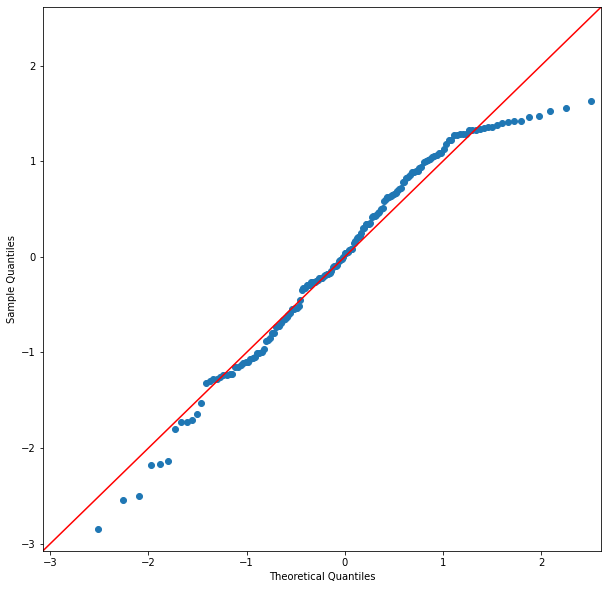

Q-Q Plot for the hf_score of year 2018


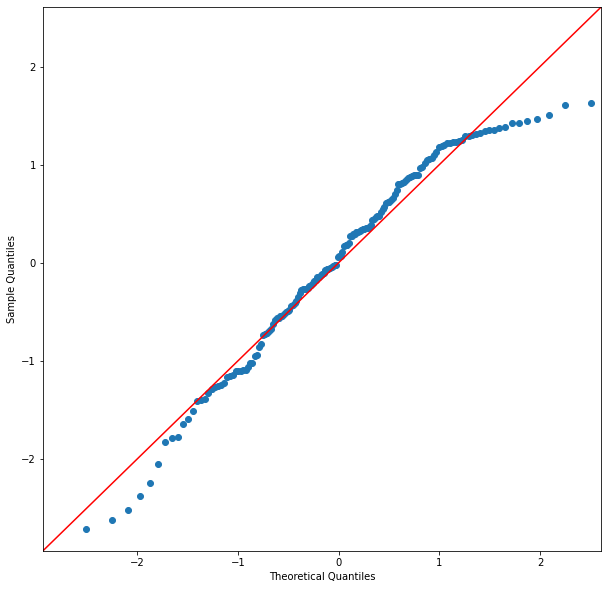

Q-Q Plot for the hf_score of year 2017


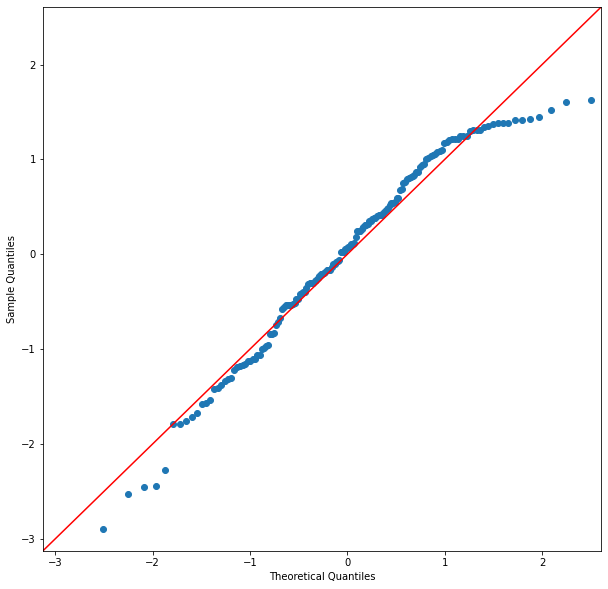

Q-Q Plot for the hf_score of year 2016


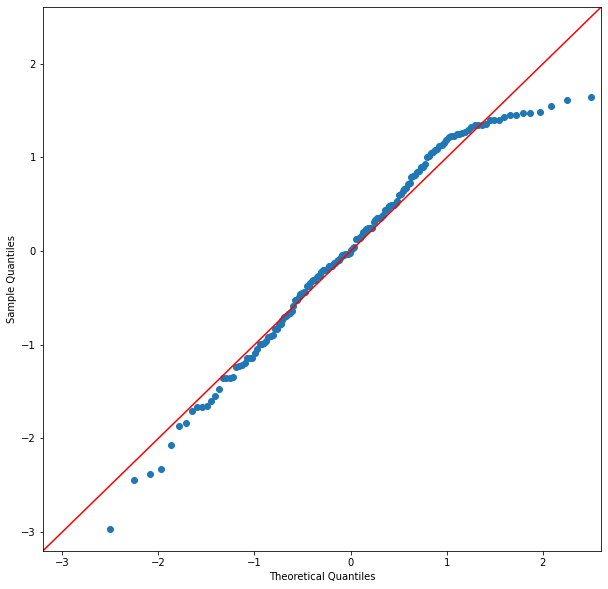

Q-Q Plot for the hf_score of year 2015


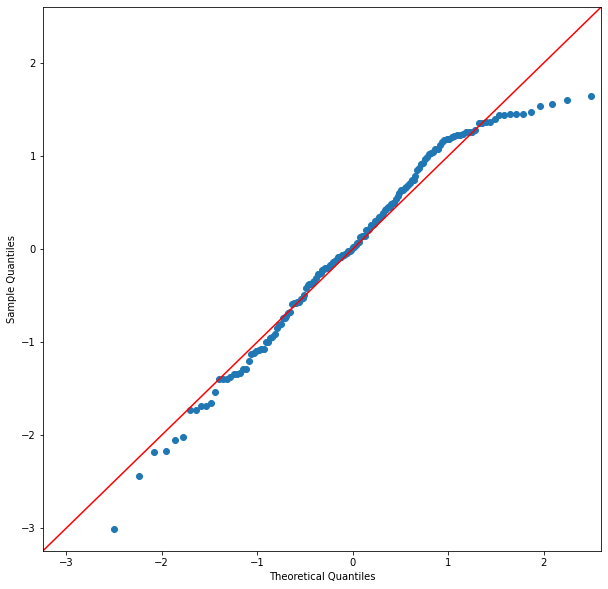

Q-Q Plot for the hf_score of year 2014


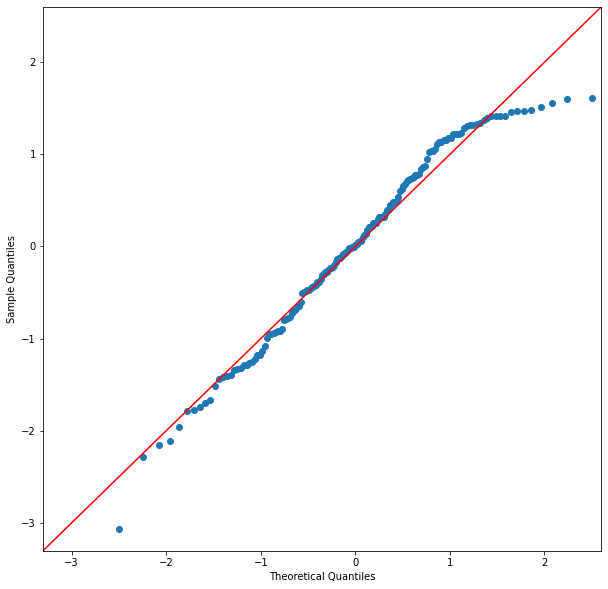

Q-Q Plot for the hf_score of year 2013


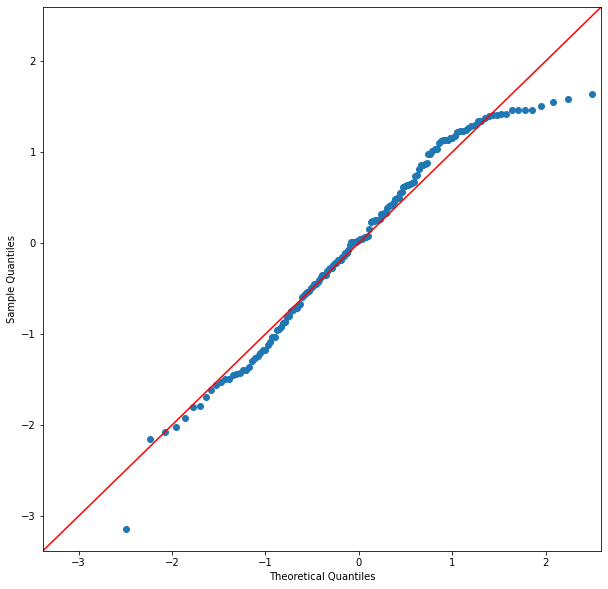

Q-Q Plot for the hf_score of year 2012


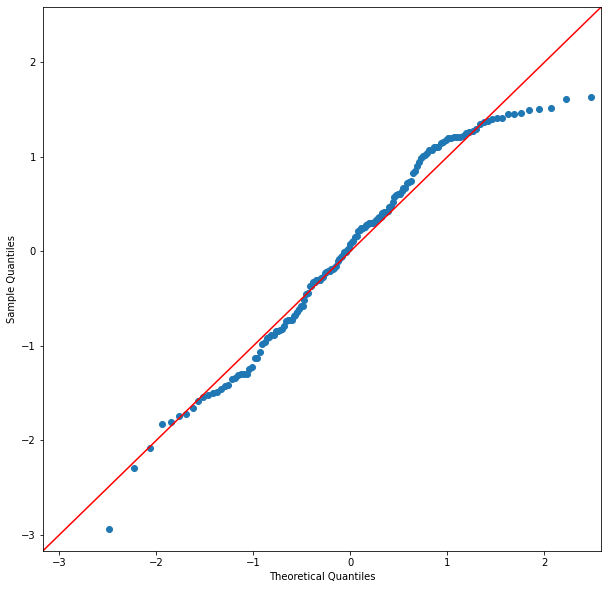

Q-Q Plot for the hf_score of year 2011


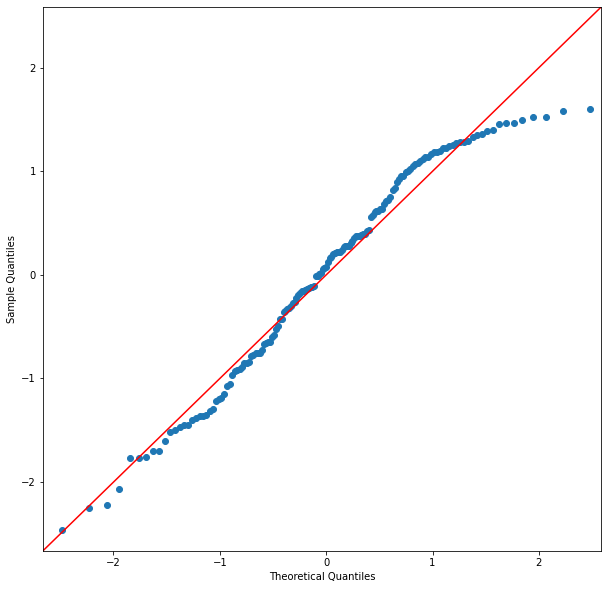

Q-Q Plot for the hf_score of year 2010


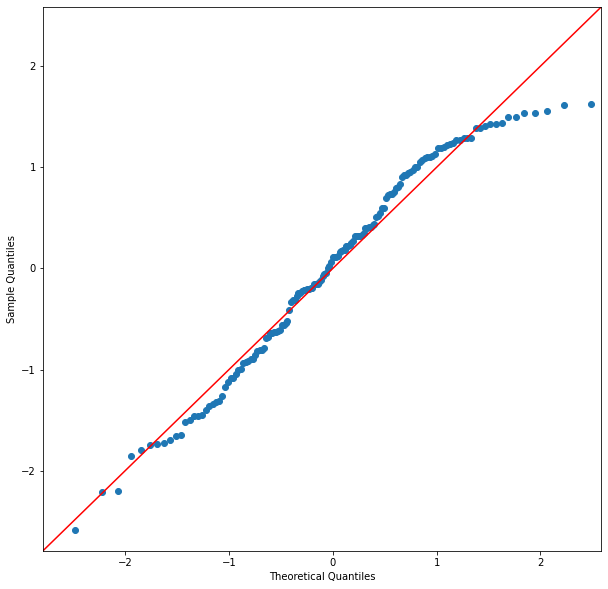

Q-Q Plot for the hf_score of year 2009


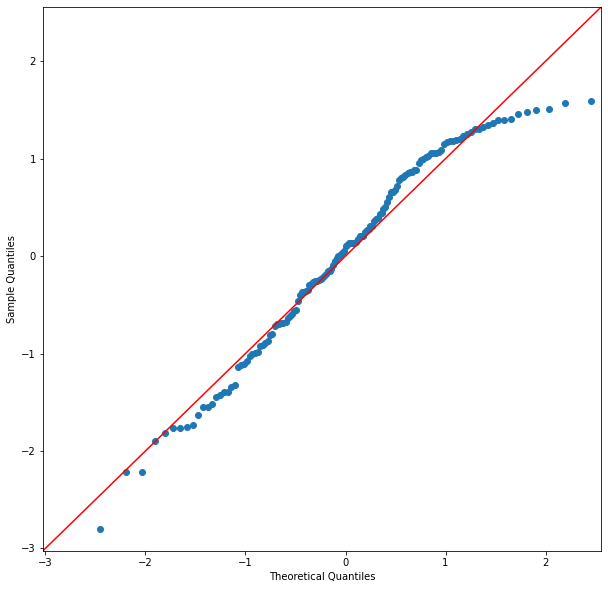

Q-Q Plot for the hf_score of year 2008


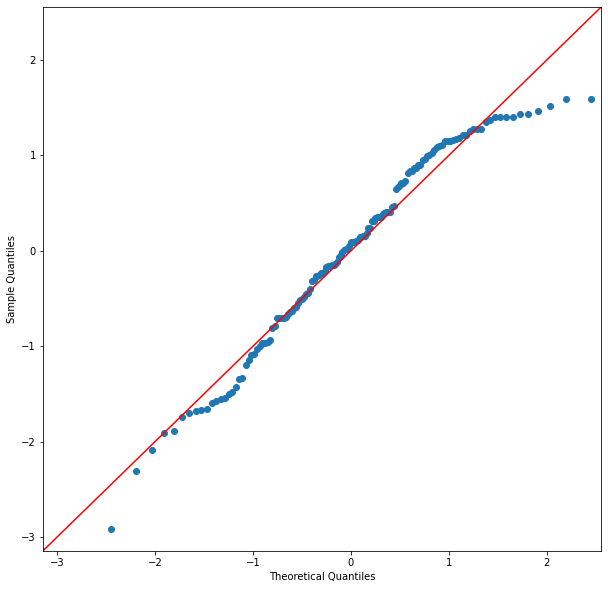

In [81]:
for year in eda_1['year'].unique():
  year_df = eda_1.loc[eda_1['year'] == year]
  # Q-Q plot requires it to be sorted in ascending order
  year_df = year_df.sort_values('hf_score')
  print(f"Q-Q Plot for the hf_score of year {year}")
  with matplotlib.rc_context():
    matplotlib.rc("figure", figsize=(10,10))
    sm.qqplot(year_df[['hf_score']], line='45', fit=True)
    py.show()

As is shown, for all years, the dataset does indeed follow a normal distribution because the points align with the theoretical quantile distribution as indicated by the 45 degree line.

Our second diagram will be a dot plot. This is useful in order to visualize the distribution of the countries based on their **hf_score**.

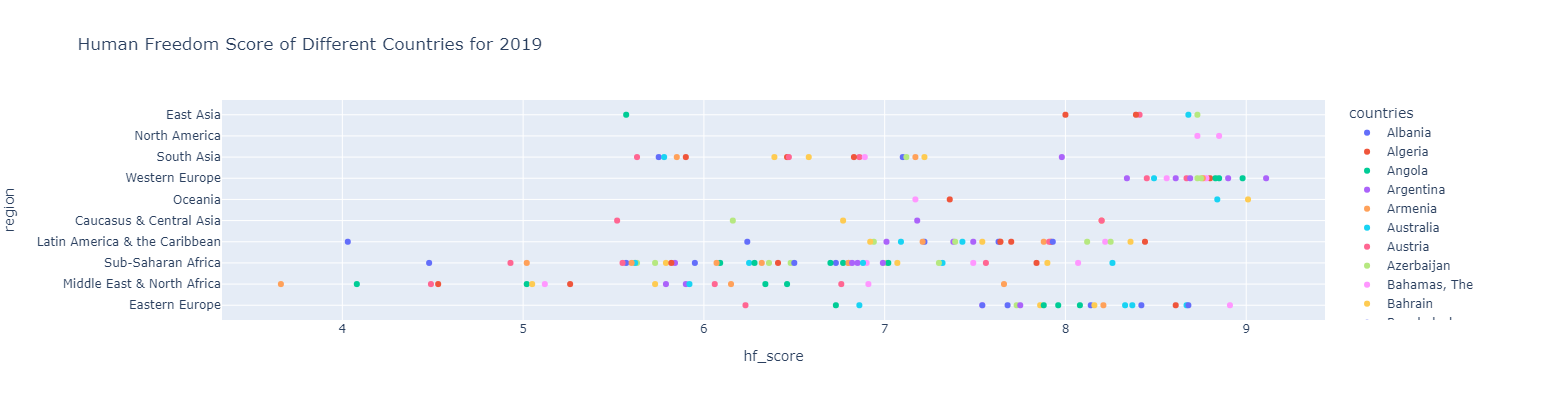

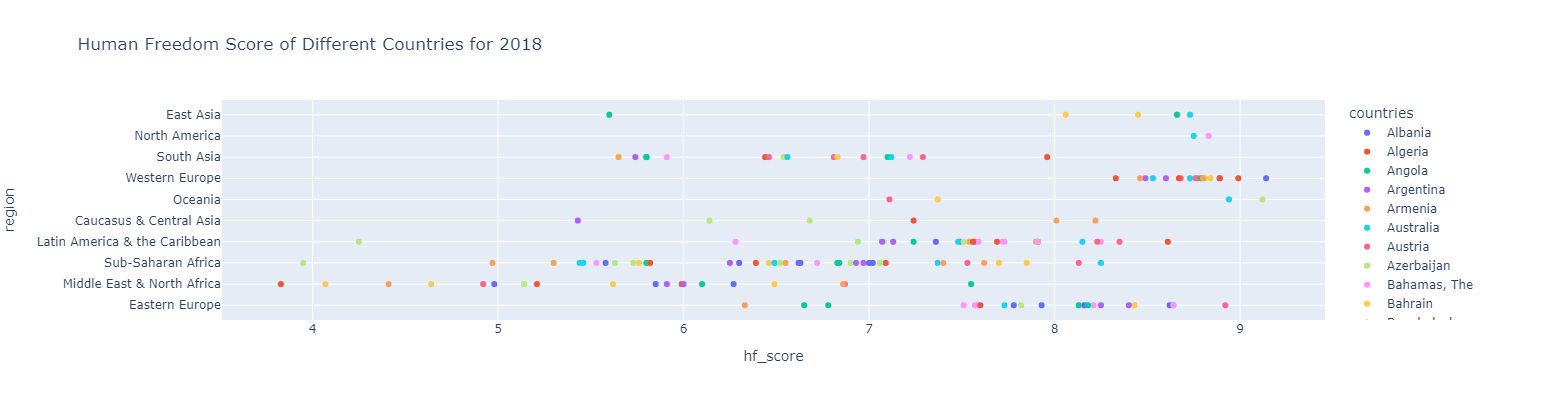

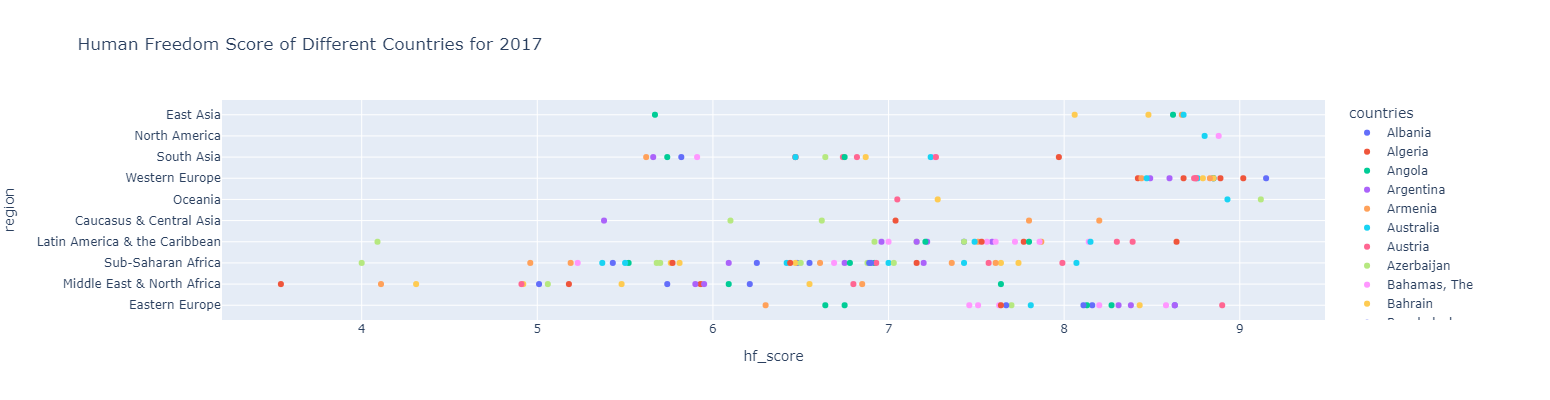

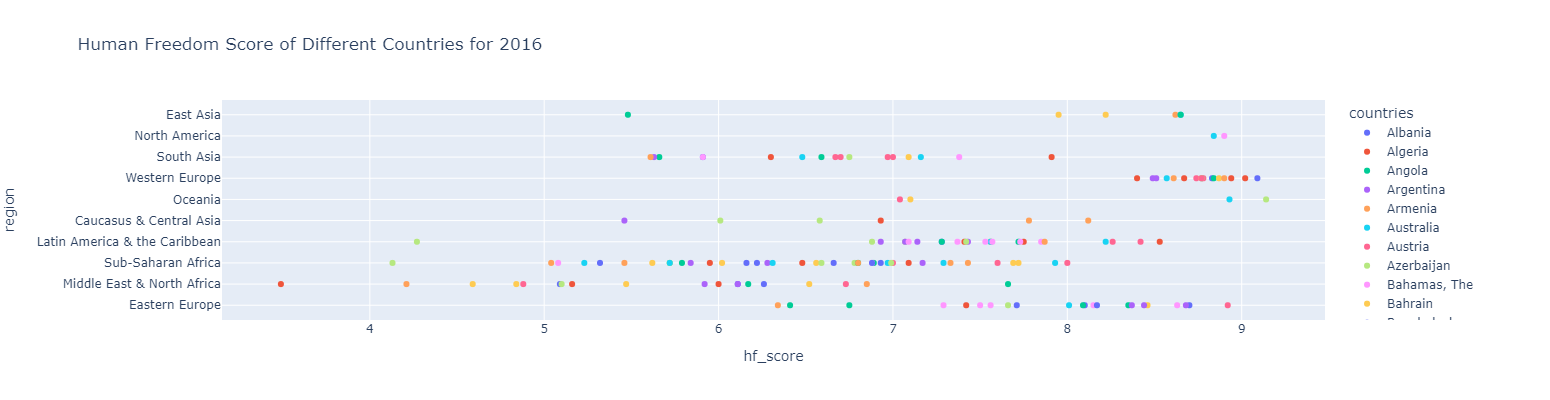

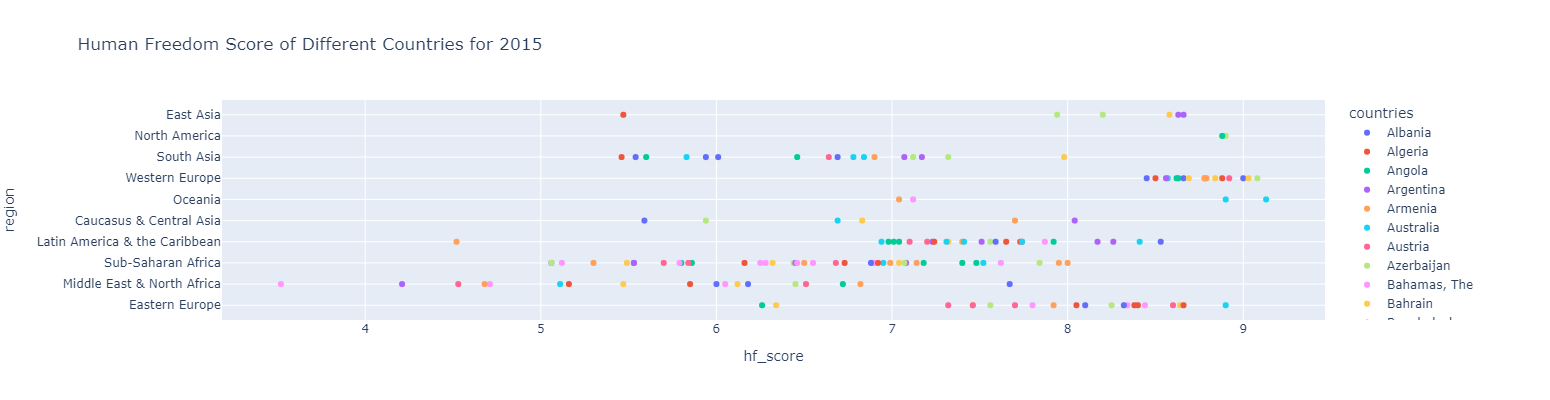

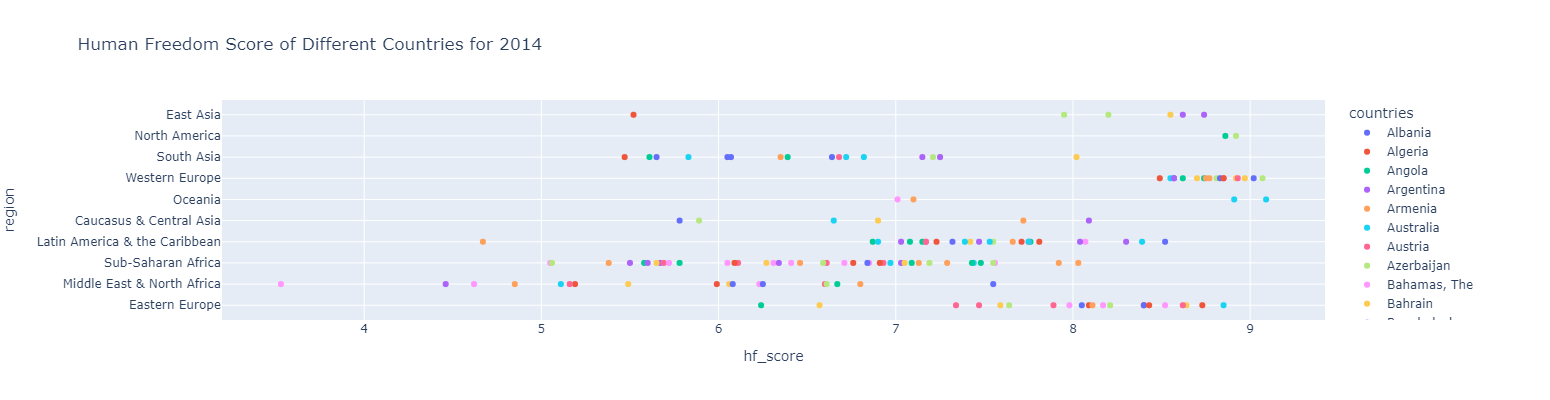

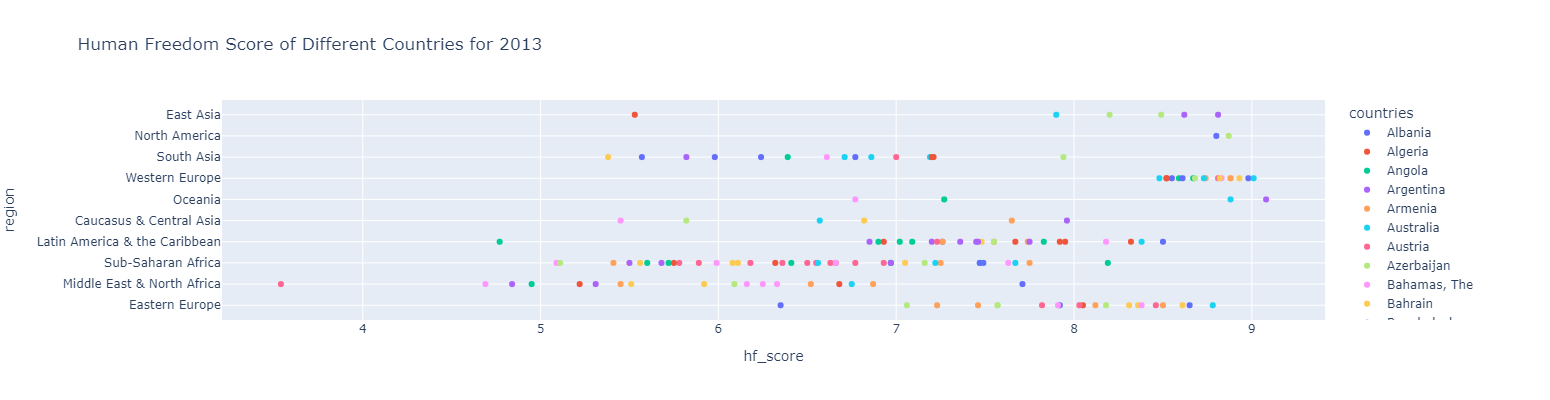

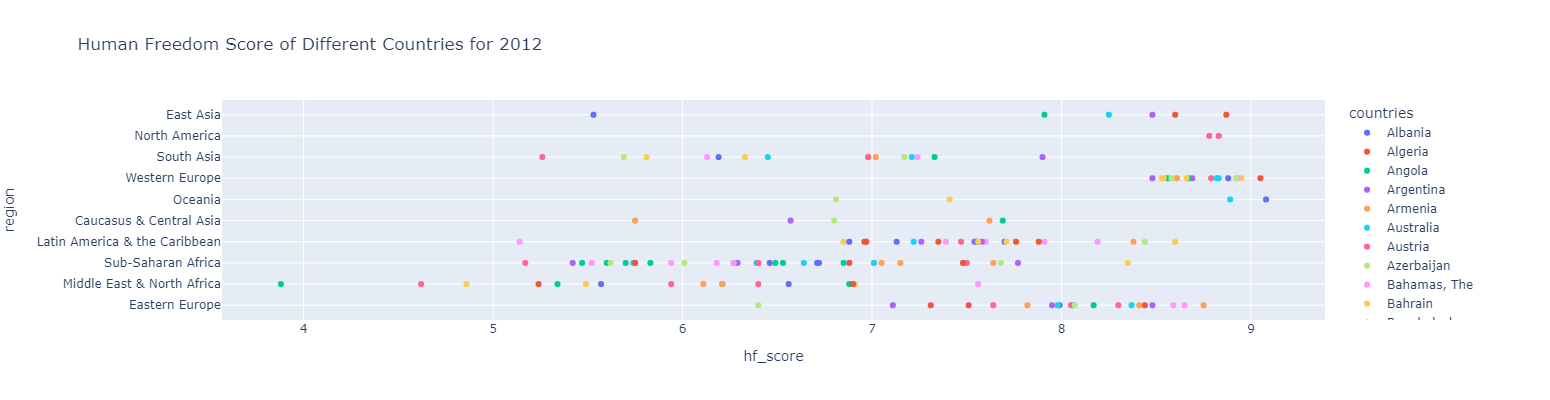

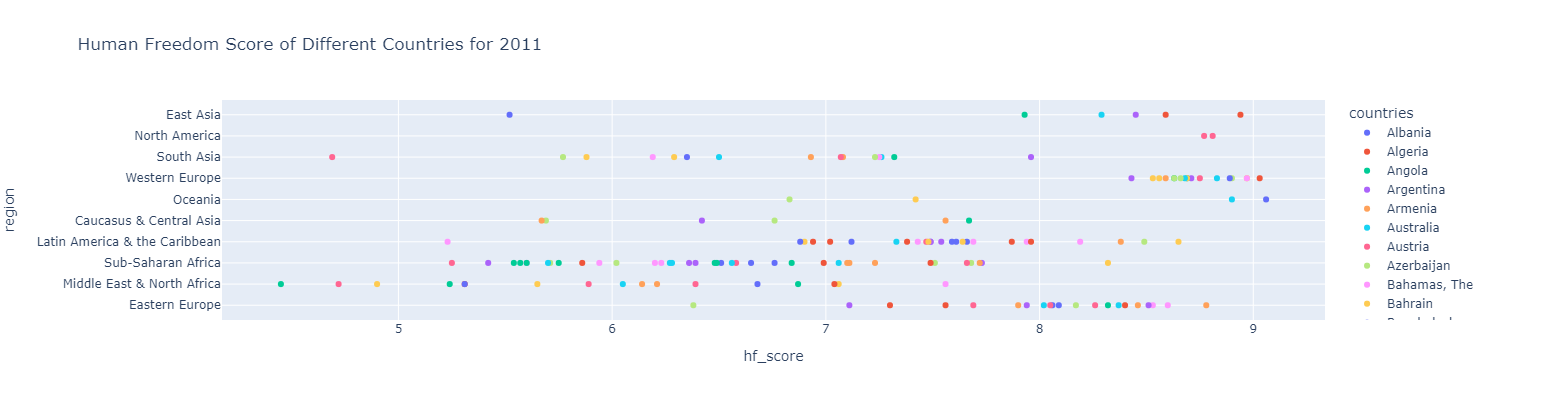

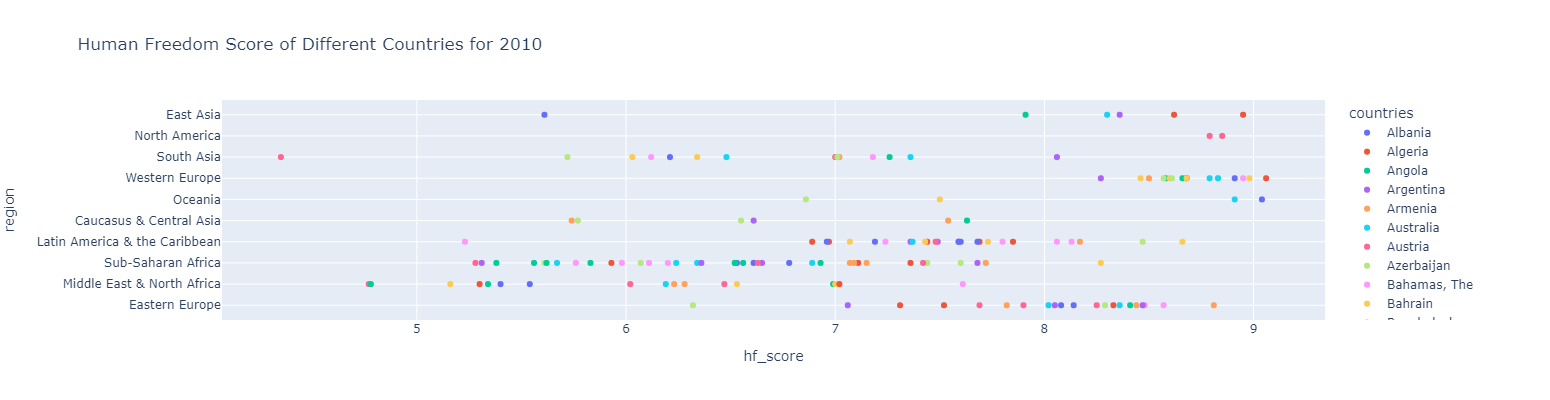

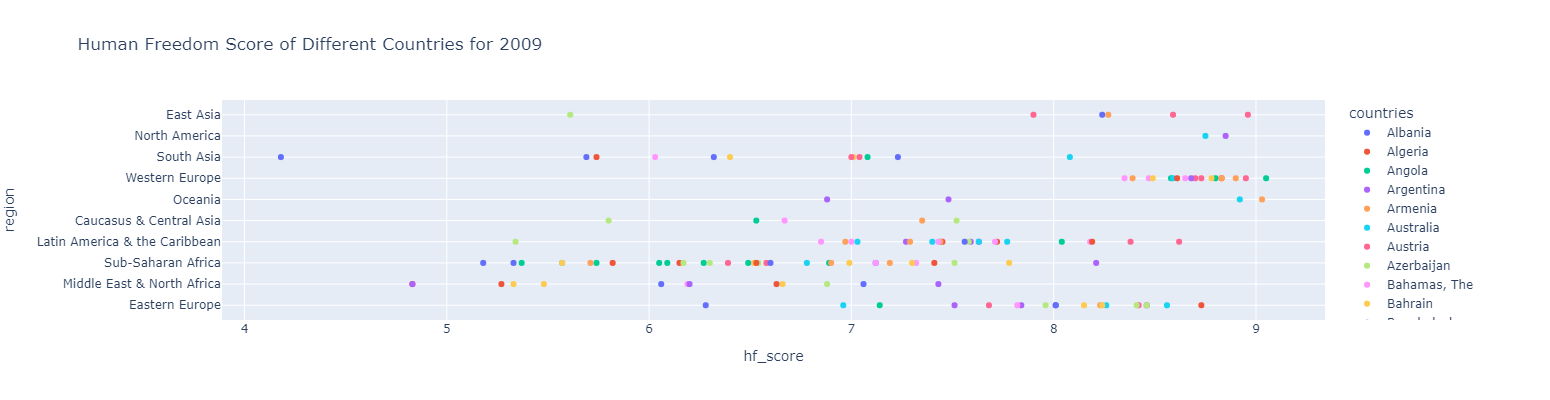

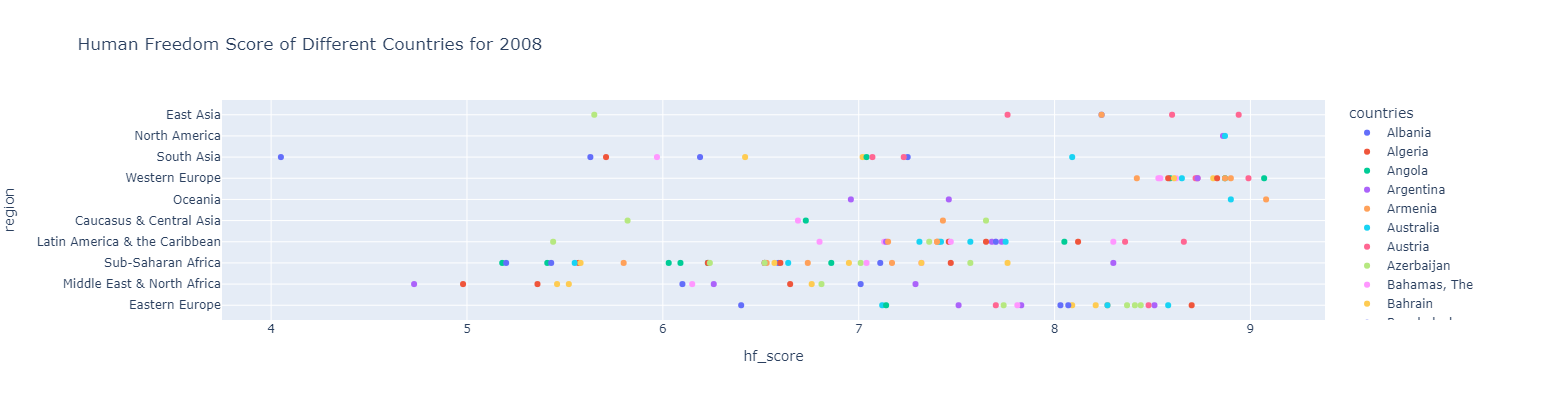

In [82]:
for year in eda_1['year'].unique():
  year_df = eda_1.loc[eda_1['year'] == year]
  fig = px.scatter(year_df, x='hf_score', y='region', color='countries', title=f"Human Freedom Score of Different Countries for {year}", width=1000, height=400)
  fig.show()

The chart is very cluttered because we are plotting all countries at once. Let us limit plotting to countries that have the best and worst **hf_score** per year.

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



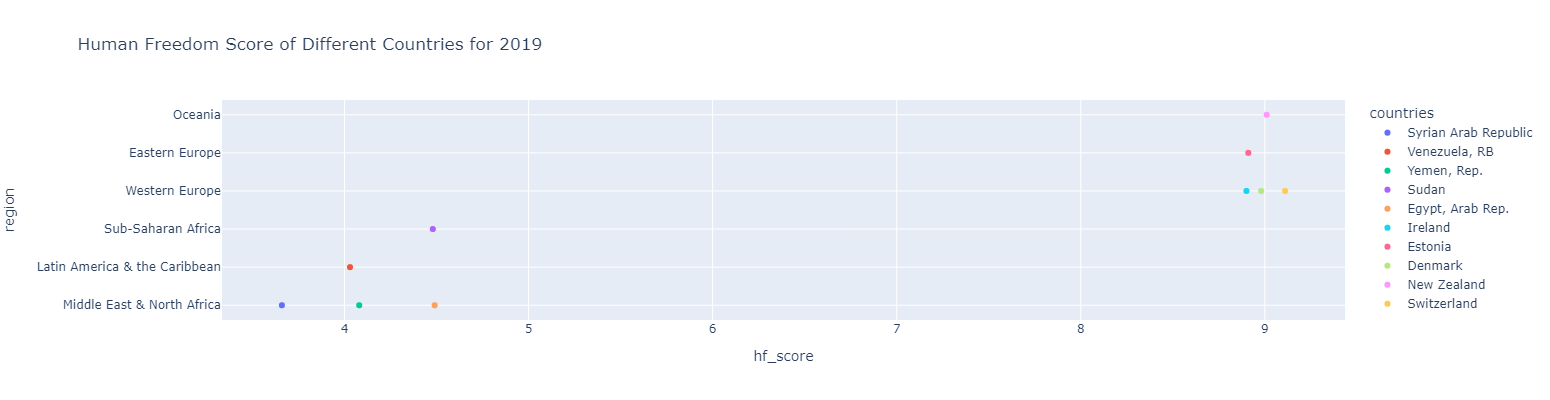

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



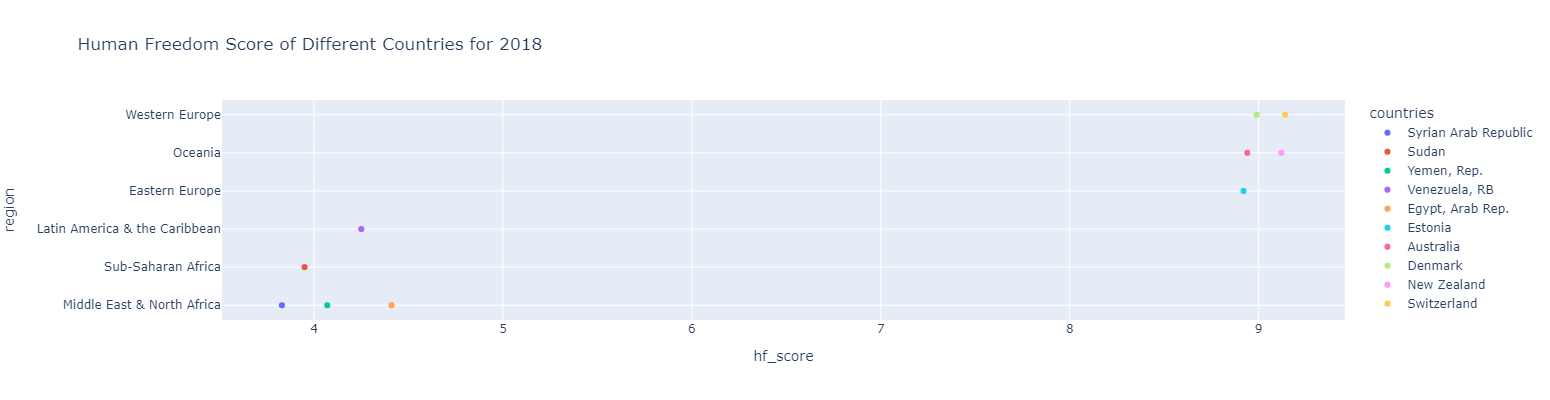

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



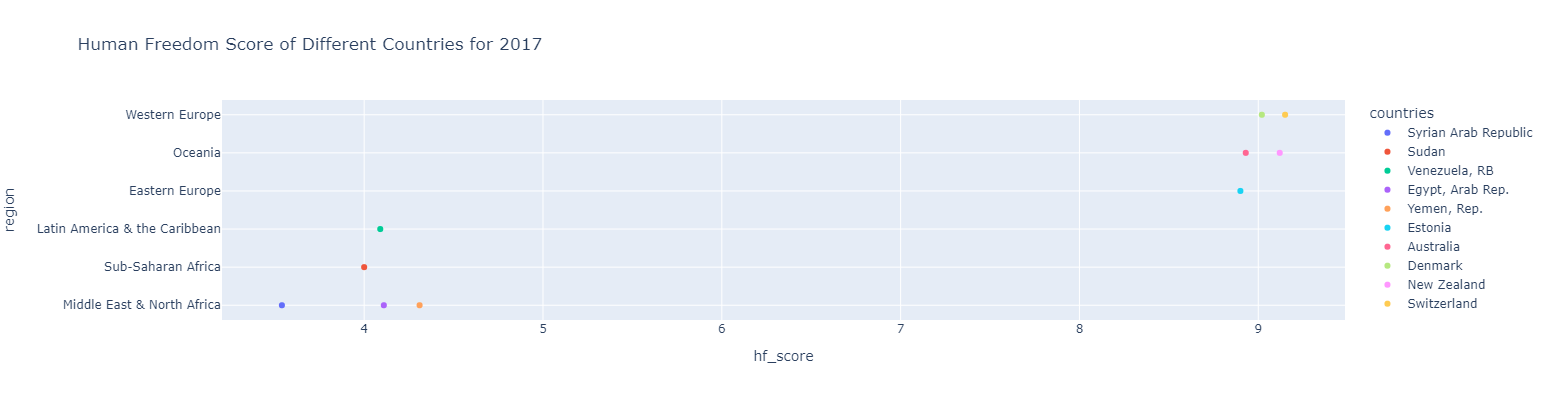

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



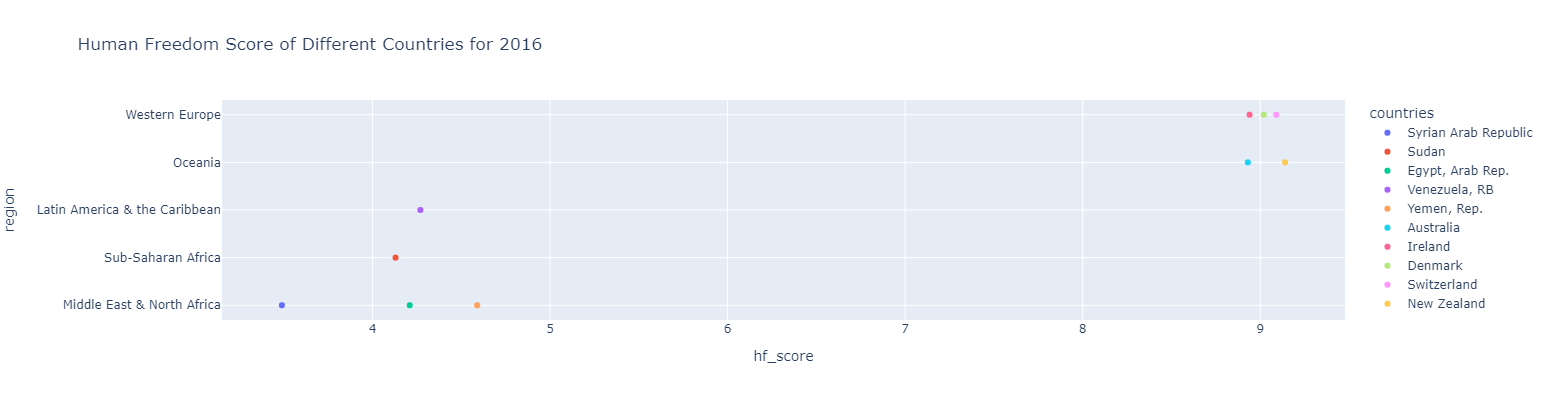

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



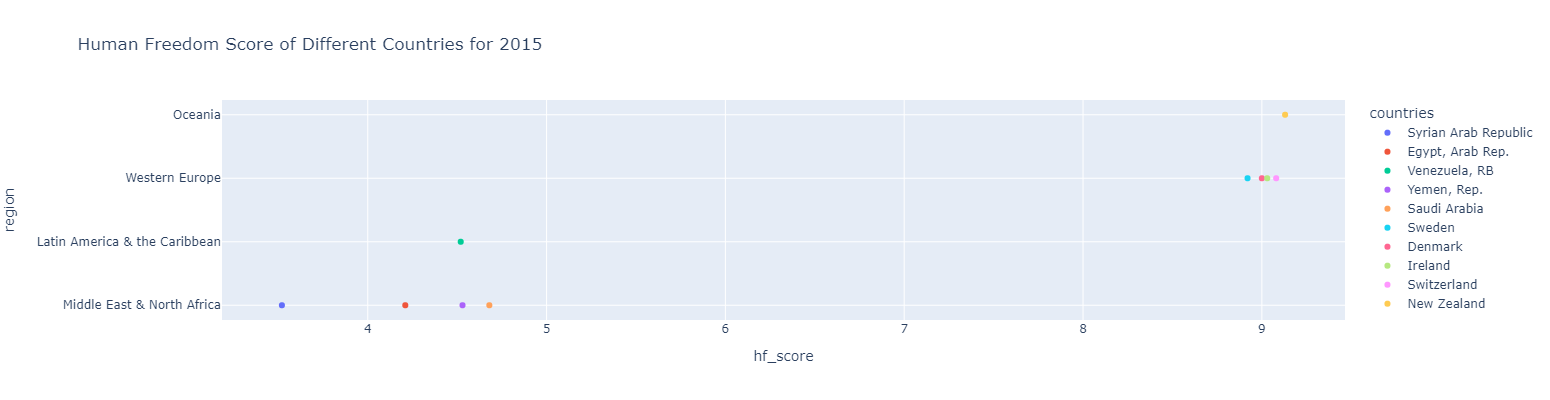

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



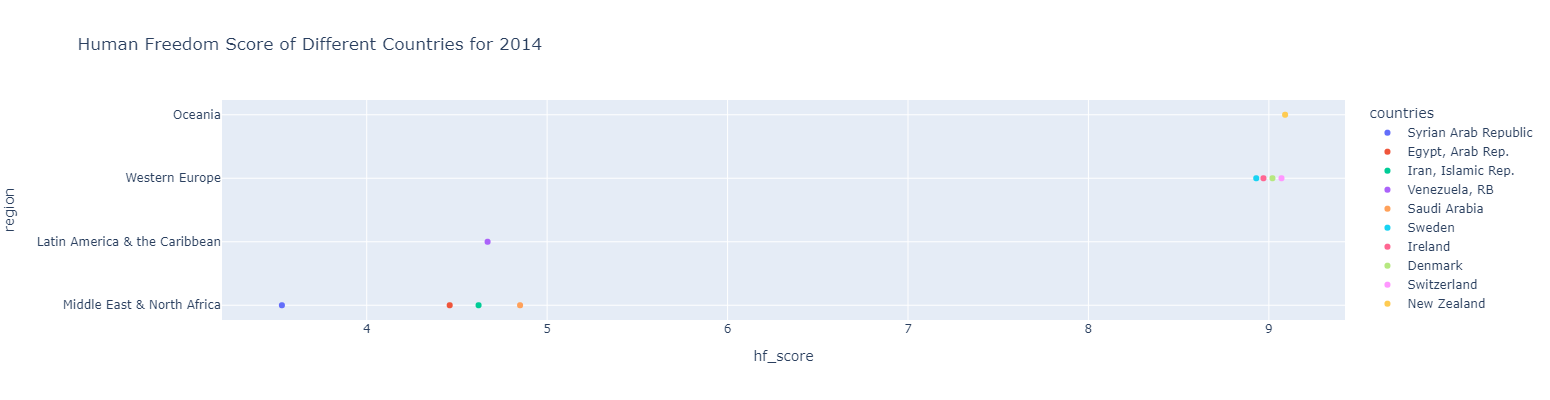

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



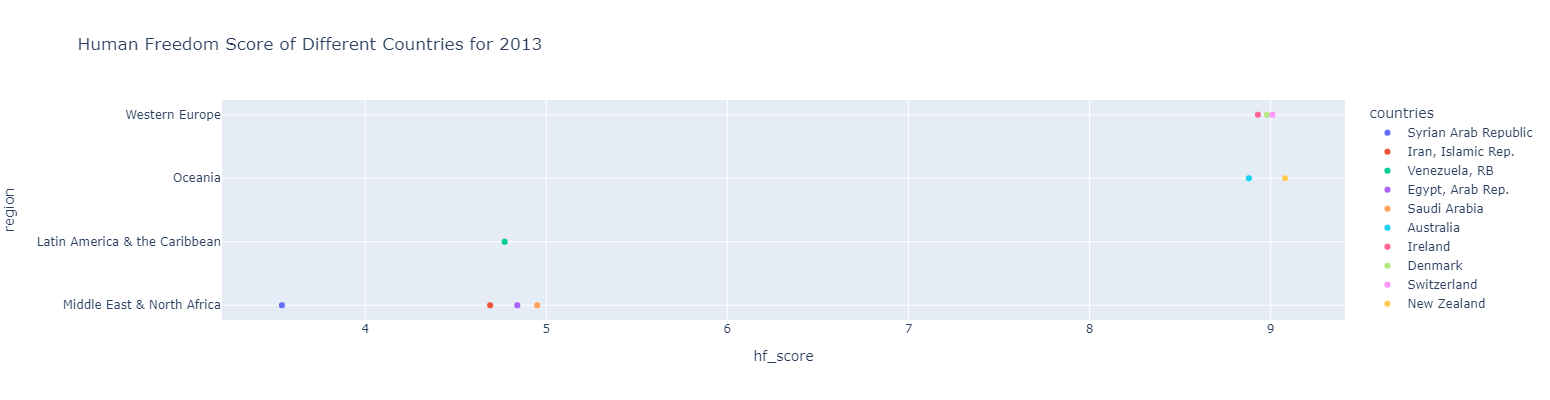

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



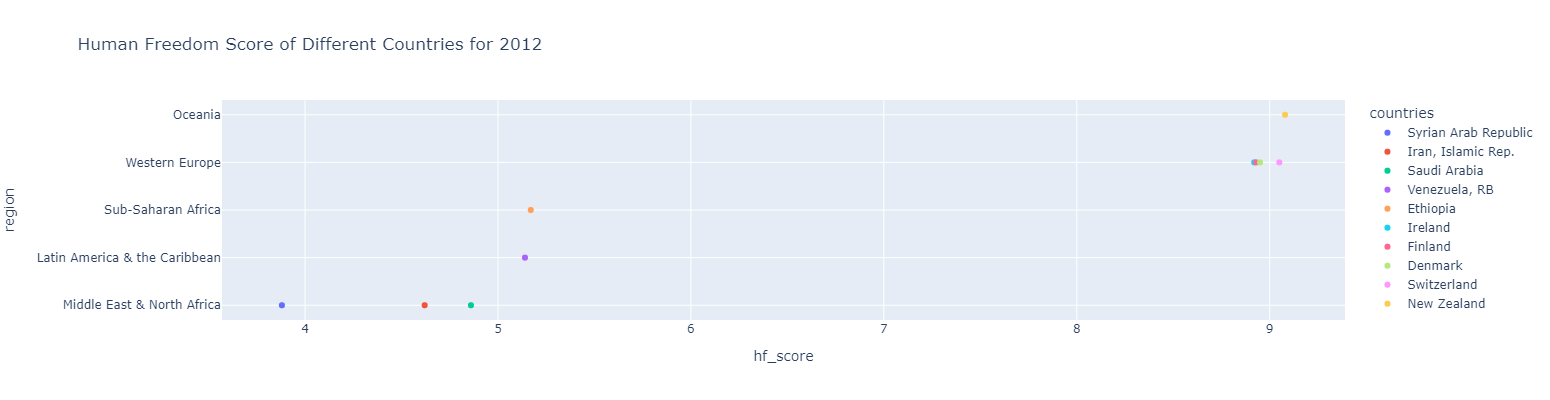

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



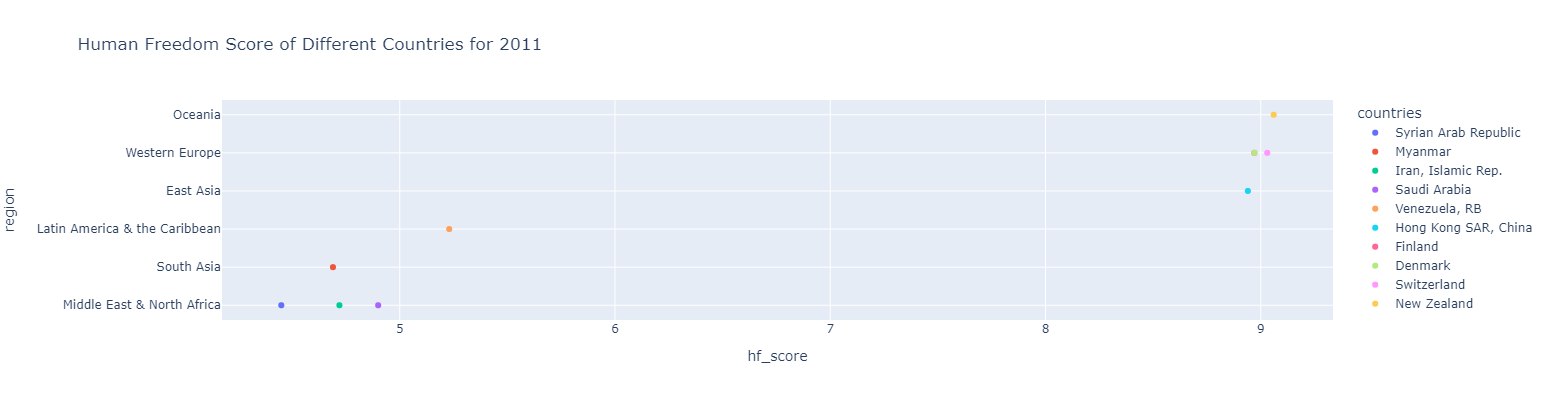

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



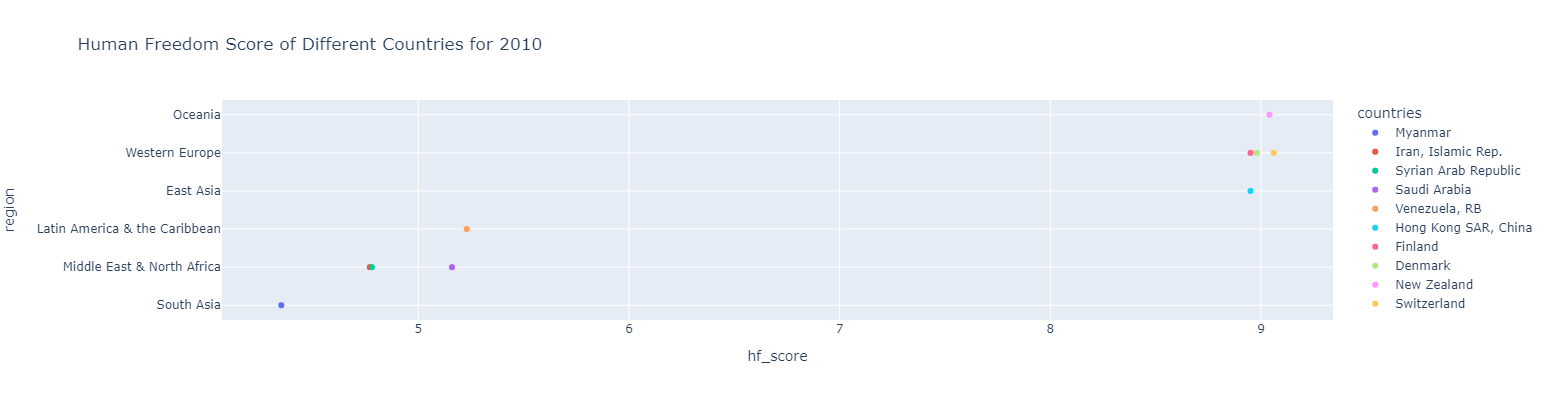

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



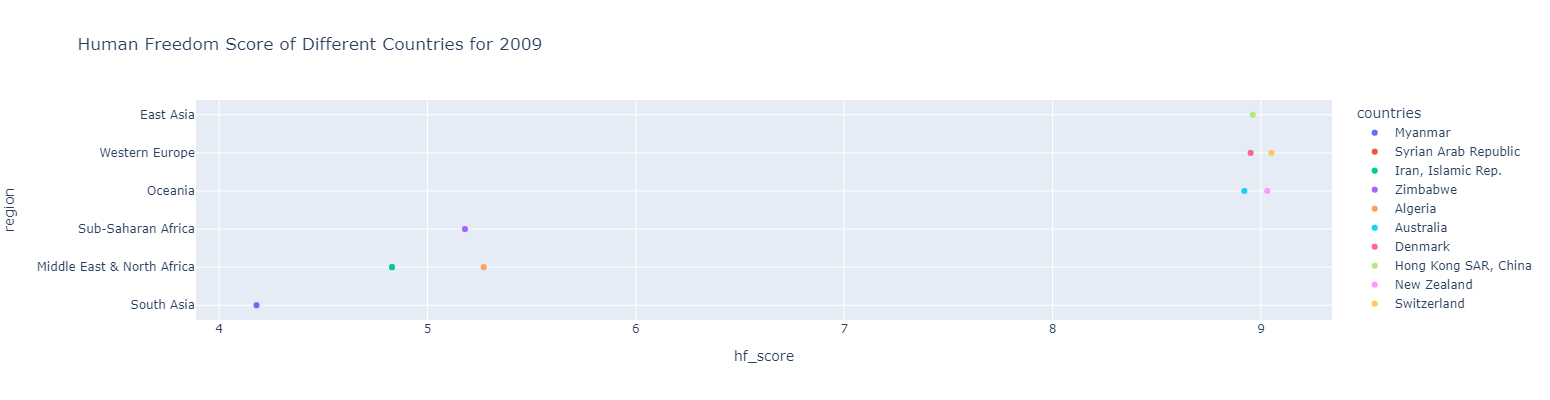

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3914068316.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



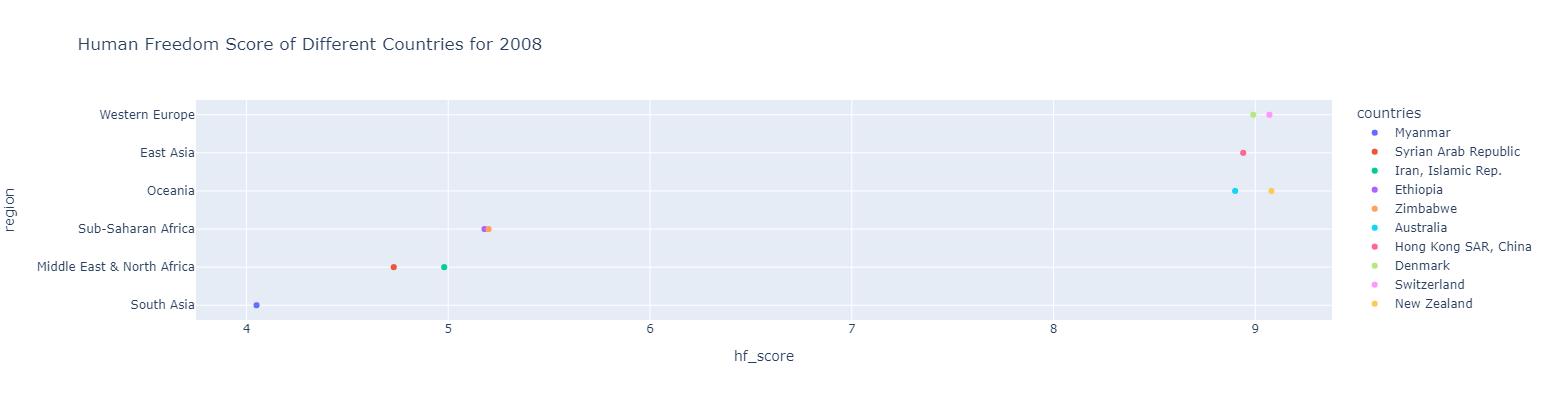

In [83]:
for year in eda_1['year'].unique():
  year_df = eda_1.loc[eda_1['year'] == year]
  year_df = year_df.sort_values('hf_score')
  year_df = (year_df.iloc[0:5]).append(year_df.iloc[len(year_df) - 5 : len(year_df)], ignore_index=True)

  fig = px.scatter(year_df, x='hf_score', y='region', color='countries', title=f"Human Freedom Score of Different Countries for {year}", width=1000, height=400)
  fig.show()

It is easier to see now that certain countries consistenly rank low. In this case, **Myanmar** is ranked last from 2008-2010. Meanwhile from 2011-2019, **Syrian Arab Replublic** places last.

On the other hand, the top two scoring countries are consistenly **New Zealand** (1st place) and **Switzerland** (2nd place) from 2008-2019. These two countries are not in the same region which is surprising. It is also interesting to notice that when a region has a country that is a part of the bottom **hf_score** countries then that region will not have a country that is a part of the top **hf_score** countries. This begs the question, is region a good indicator for **hf_score**?

The plots answer the EDA 1 question by showing us which COUNTRIES for every year has the highest and lowest **hf_score**.

Let us now see the summary of the data by getting the **hf_score** mean, median, and standard deviation per region. We can visualize the median and standard deviation of different regions over the years using a box-plot.

<AxesSubplot:xlabel='hf_score', ylabel='region'>

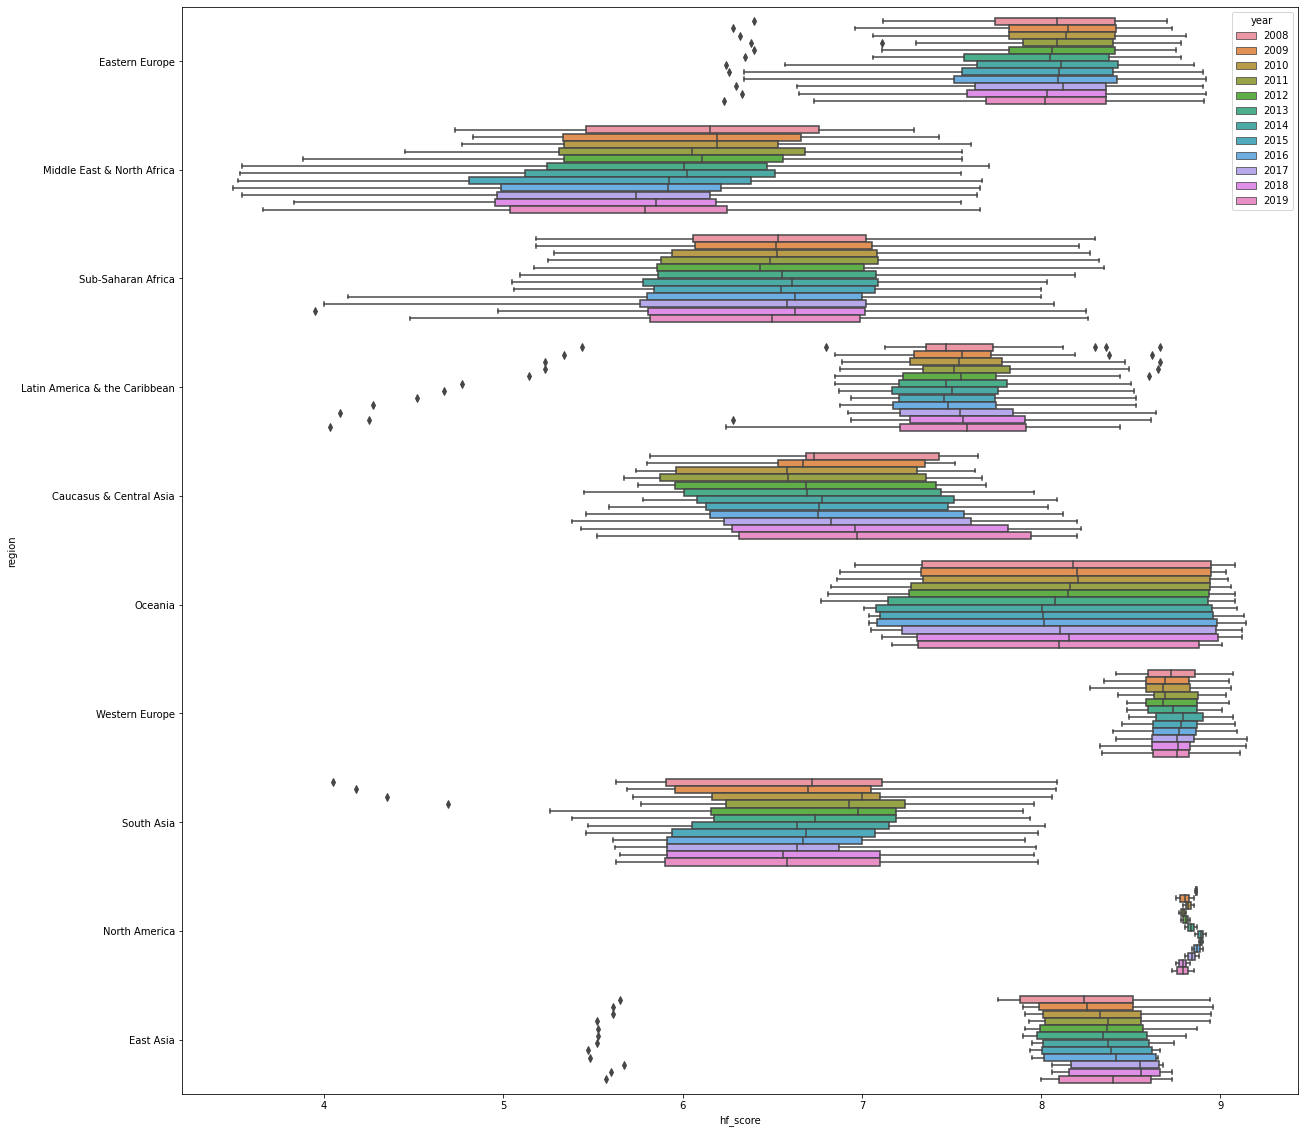

In [84]:
plt.figure(figsize= (20, 20))
sns.boxplot(data=eda_1, x="hf_score", y="region", hue="year")

We can observe from the box-plot that the regions **Western Europe** and **North America** consistently have the highest **hf_score**. Meanwhile, the region **Middle East & North Africa** have the lowest **hf_score** over the years. It is also important to note that there are a lot of outliers in **East Asia**, **Easter Europe**, and **Latin America & The Caribbean**. It may be worth investigating in the future why some regions have more outliers. It should be noted that some regions like **North America** have very little countries which is why their variance seem low.

This box plot answers the EDA 1 question by showing us which REGION for every year has the highest and lowest **hf_score**.

Finally, Let us look at the median **hf_score** for every region over the years. It can be noticed using the plots below that **North America** and **Western Europe** have the highest scores. Note: No need to mind the years for this plot, we will better visualize change over the years using a line chart later. It is better to understand for now which regions have the highest scores compared to other regions.

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\4054482217.py:1: FutureWarning:

['countries'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



<AxesSubplot:xlabel="('hf_score', 'mean')", ylabel='region'>

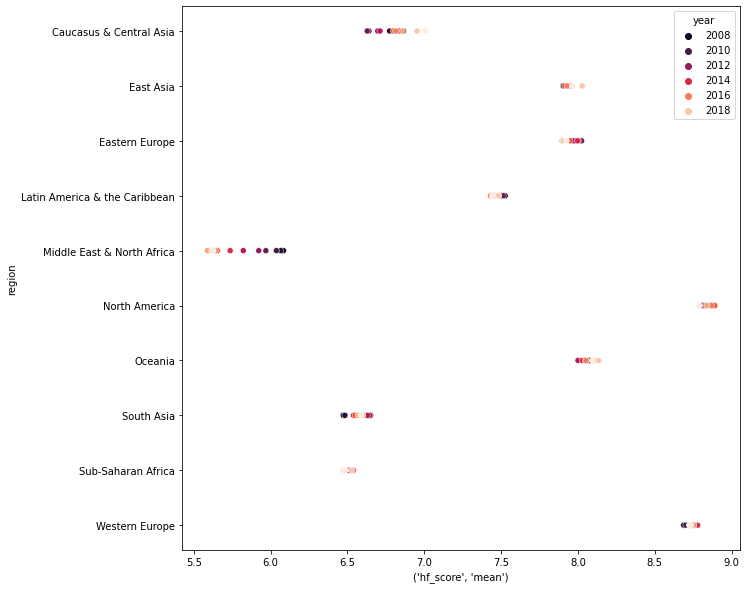

In [85]:
eda1_agg = eda_1.groupby(['year', 'region']).agg(['mean','median','std'])
ed1_agg = eda1_agg.reset_index()
plt.figure(figsize= (10, 10))
sns.scatterplot(data=eda1_agg, x=('hf_score', 'mean'), y='region', hue='year', palette="rocket")

Now let us investigate how **hf_score** using a line chart to better visualize the change over time.

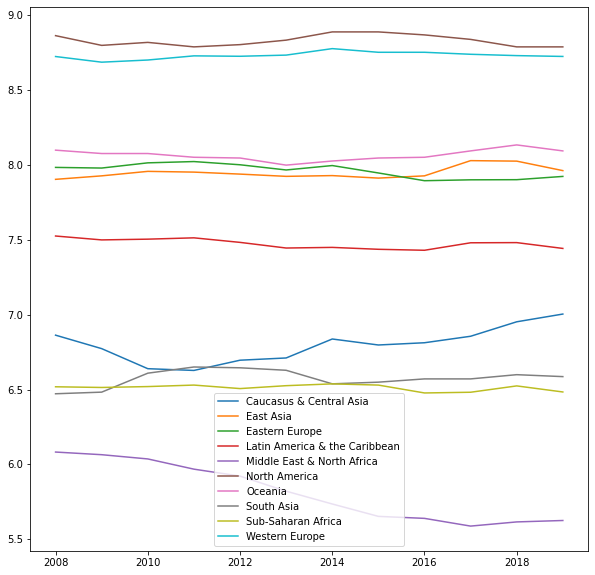

In [86]:
# Format Dataframe to make usable for line chart function

# Group plots per region
gb = eda_1.groupby('region')    
regions_df_list = [gb.get_group(x) for x in gb.groups]

# Make empty dataframe for line chart format--index is year
date_df = pd.DataFrame(index=eda_1['year'].unique())
for region in regions_df_list:
  # Get mean of each region grouped by year and add to date_df
  region_mean = region.groupby(['year']).agg({'hf_score': ['mean']})
  region_mean.columns = region_mean.columns.droplevel(1)
  region_mean = region_mean.reset_index().rename(columns={'hf_score': region.iloc[0]['region']}).set_index('year')
  date_df = date_df.add(region_mean, fill_value=0)

lines = date_df.plot.line(figsize=(10, 10))

It can be seen that the mean **hf_score** for each region has not changed a significant amount over the past 11 years except for **Caucasus & Central Asia** (trending up) and **Middle East & North Africa** (trending down).

Let us take a closer look at the most significant players in the dataset. Let us investigate the trend of the highest and lowest scoring countries. We will do this by plotting the countries that have the highest and lowest **hf_score** mean over the 11 years.

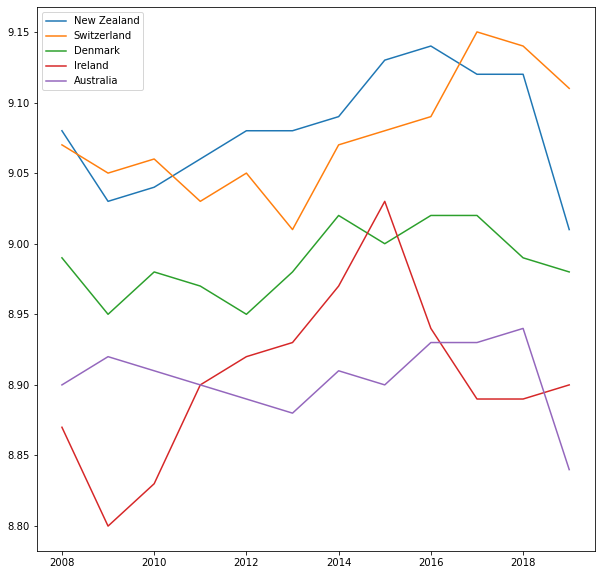

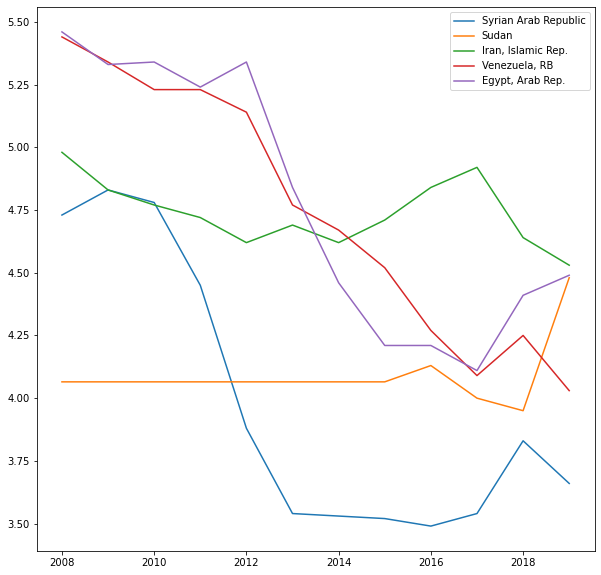

In [87]:
BESTOF=5
# Get the top 5 countries based on their mean
country_mean_df = eda_1.drop(['region', 'year'], axis=1).groupby(['countries']).agg(['mean'])
worst_df = country_mean_df.nsmallest(BESTOF, columns=('hf_score', 'mean')).reset_index(level=0).drop(('hf_score', 'mean'), axis=1).T.values.flatten()
best_df = country_mean_df.nlargest(BESTOF, columns=('hf_score', 'mean')).reset_index(level=0).drop(('hf_score', 'mean'), axis=1).T.values.flatten()

def make_line_chart(df):
  date_df = pd.DataFrame(index=eda_1['year'].unique())
  # Add each country to the dataframe organized in years
  for country in df:
    country_df = eda_1.loc[eda_1['countries'] == country]
    country_hf_score = country_df[['year', 'hf_score']]
    country_hf_score.set_index('year', inplace=True)
    # Rename column
    country_hf_score = country_hf_score.rename(columns={'hf_score':country})
    # Check if there are data missing for some years for the country
    try:
      date_df[country] = country_hf_score.values
    except:
      # Add missing years to dataframe and impute scores
      country_hf_score = country_hf_score.reindex(eda_1['year'].unique())
      country_hf_score = imputeBasedOnSkew(country_hf_score.squeeze())
      # Add country to dataframe
      date_df[country] = country_hf_score.values
  lines = date_df.plot.line(figsize=(10, 10))

make_line_chart(best_df)
make_line_chart(worst_df)

Based from the charts, some countries have had an increasing trend in their **hf_score** over the years and some have decreased. One of the most interesting findings in this chart is the extreme downward trend of **Venezuela**, **Egypt**, and **Syrian Arab Republic** from 2008 to 2017. Another point worth investigating is why the top 5 countries (except **Ireland**) have a decreasing **hf_score** from 2017 to 2019. 

Notably, the rankings between the top 5 and the bottom 5 countries have remained fairly consistent. For the top countries, it is always either **Switzerland** or **New Zealand** at the top followed by **Denmark** followed by either **Ireland** or **Australia**. In the bottom 5, it is much more unstable since some countries such as **Syrian Arab Republic** and **Venezuela** have a massive downward trend.

To Summarize ----------------------

EDA 1 Question: For each year, which region and which countries had the highest **hf_score** rating? Which had the lowest?

| Year        | Region with highest **hf_score** mean   | Country with highest **hf_score** | Region with lowest **hf_score** mean | Country with lowest **hf_score** |
| ----------- | --------------------------------------- | --------------------------------- | ----------------------------------- | -------------------------------- |
| 2008        | North America                           | New Zealand                       | Middle East & North Africa          | Myanmmar                         |
| 2009        | North America                           | Switzerland                       | Middle East & North Africa          | Myanmmar                         |
| 2010        | North America                           | Switzerland                       | Middle East & North Africa          | Myanmmar                         |
| 2011        | North America                           | New Zealand                       | Middle East & North Africa          | Syrian Arab Republic             |
| 2012        | North America                           | New Zealand                       | Middle East & North Africa          | Syrian Arab Republic             |
| 2013        | North America                           | New Zealand                       | Middle East & North Africa          | Syrian Arab Republic             |
| 2014        | North America                           | New Zealand                       | Middle East & North Africa          | Syrian Arab Republic             |
| 2015        | North America                           | Switzerland                       | Middle East & North Africa          | Syrian Arab Republic             |
| 2016        | North America                           | Switzerland                       | Middle East & North Africa          | Syrian Arab Republic             |
| 2017        | North America                           | Switzerland                       | Middle East & North Africa          | Syrian Arab Republic             |

The region with the highest **hf_score** mean is always North America possibly because there are only two countries in this region and their scores are both high. Meanwhile **New Zealand** in **Oceana** and **Switzerland** in **Western Europe** may have countries that pull the regions mean down. The region with the lowest **hf_score** is consistently **Middle East & North Africa**. It can be seen from this table that there is not much change between the lowest and highest scoring regions and countries.

## **EDA Question 2**
Question: Out of the different pf and ef factors, which pairs are the most and least correlated with one another.

To answer the question in a visual manner, we will create a correlation matrix. We do not need to aggregate the data per year and per country since we wish to investigate the relationship betwen subfactors at any given time and place. 

Our initial hypothesis might be that factors are strongly correlated with other factors that relate to the same thing. For example all **ef_trade** factors might be correlated with each other and all **pf_assembly** factors might be correlated with each other.

To start, we can filter our dataset to only the pf and ef factors and assign it to a new dataframe object.

In [88]:
pf_ef_features = pf_features + ef_features

In [89]:
eda_2 = hfi_dataset[pf_ef_features]
eda_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1979
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   pf_rol                              1867 non-null   float64
 1   pf_ss_killings                      1867 non-null   float64
 2   pf_ss_disappearances                1867 non-null   float64
 3   pf_movement                         1867 non-null   float64
 4   pf_religion_freedom                 1867 non-null   float64
 5   pf_assembly_entry                   1867 non-null   float64
 6   pf_assembly_freedom                 1867 non-null   float64
 7   pf_expression_cultural              1867 non-null   float64
 8   pf_expression_gov                   1867 non-null   float64
 9   pf_expression_internet              1867 non-null   float64
 10  pf_expression_selfcens              1867 non-null   float64
 11  pf_expression_freedom               1867 no

We then construct the correlation matrix as follows.

In [90]:
ef_pf_correlation_matrix = eda_2.corr()
ef_pf_correlation_matrix

pf_rol  pf_ss_killings  \
pf_rol                              1.000000        0.669501   
pf_ss_killings                      0.669501        1.000000   
pf_ss_disappearances                0.620835        0.823187   
pf_movement                         0.545223        0.638205   
pf_religion_freedom                 0.348837        0.466955   
pf_assembly_entry                   0.394803        0.581726   
pf_assembly_freedom                 0.641909        0.711827   
pf_expression_cultural              0.506713        0.688386   
pf_expression_gov                   0.556501        0.621814   
pf_expression_internet              0.403980        0.614729   
pf_expression_selfcens              0.428555        0.517511   
pf_expression_freedom               0.612879        0.659157   
ef_government_consumption           0.499647        0.290009   
ef_government_transfers             0.617857        0.464122   
ef_government_enterprises          -0.378262       -0.355377   
ef_government_soa                   0.318758        0.446483   
ef_legal_judicial                   0.845587        0.586953   
ef_legal_courts                     0.907331        0.575297   
ef_legal_protection                 0.801798        0.441319   
ef_legal_military                   0.714202        0.528960   
ef_legal_integrity                  0.854913        0.612658   
ef_legal_enforcement                0.627684        0.373052   
ef_legal_regulatory                 0.325662        0.213308   
ef_legal_police                    -0.732713       -0.367250   
ef_money_growth                    -0.200155       -0.200404   
ef_money_sd                        -0.359545       -0.382583   
ef_money_inflation                 -0.353513       -0.331228   
ef_money_currency                   0.431821        0.277566   
ef_trade_regulatory_nontariff      -0.578585       -0.356558   
ef_trade_regulatory_compliance      0.646034        0.541669   
ef_trade_black                     -0.216836       -0.218928   
ef_trade_tariffs_revenue           -0.328231       -0.230140   
ef_trade_tariffs_mean              -0.470812       -0.479233   
ef_trade_tariffs_sd                 0.047478       -0.132045   
ef_trade_movement_foreign          -0.574776       -0.418205   
ef_trade_movement_capital          -0.354200       -0.286797   
ef_trade_movement_visit             0.370075        0.413593   
ef_regulation_credit_ownership      0.296969        0.352183   
ef_regulation_credit_private        0.178106        0.152415   
ef_regulation_credit_interest       0.310642        0.245357   
ef_regulation_labor_minwage         0.251501        0.007371   
ef_regulation_labor_firing         -0.096488        0.039127   
ef_regulation_labor_bargain         0.063887        0.051845   
ef_regulation_labor_hours           0.038699        0.050995   
ef_regulation_labor_dismissal      -0.326975       -0.209538   
ef_regulation_labor_conscription    0.190632        0.172218   
ef_regulation_business_adm         -0.259783       -0.036501   
ef_regulation_business_bureaucracy -0.676093       -0.515046   
ef_regulation_business_start        0.467071        0.357379   
ef_regulation_business_bribes       0.830795        0.721554   
ef_regulation_business_licensing    0.247724        0.123477   
ef_regulation_business_compliance  -0.486031       -0.300850   

                                    pf_ss_disappearances  pf_movement  \
pf_rol                                          0.620835     0.545223   
pf_ss_killings                                  0.823187     0.638205   
pf_ss_disappearances                            1.000000     0.686630   
pf_movement                                     0.686630     1.000000   
pf_religion_freedom                             0.480479     0.643471   
pf_assembly_entry                               0.464854     0.604557   
pf_assembly_freedom                             0.599617     0.696611   
pf_expression_cultural                          0.567233     

Naturally, it is hard to see and compare using just the matrix, so we plot it in a corr plot, as shown below.

<AxesSubplot:>

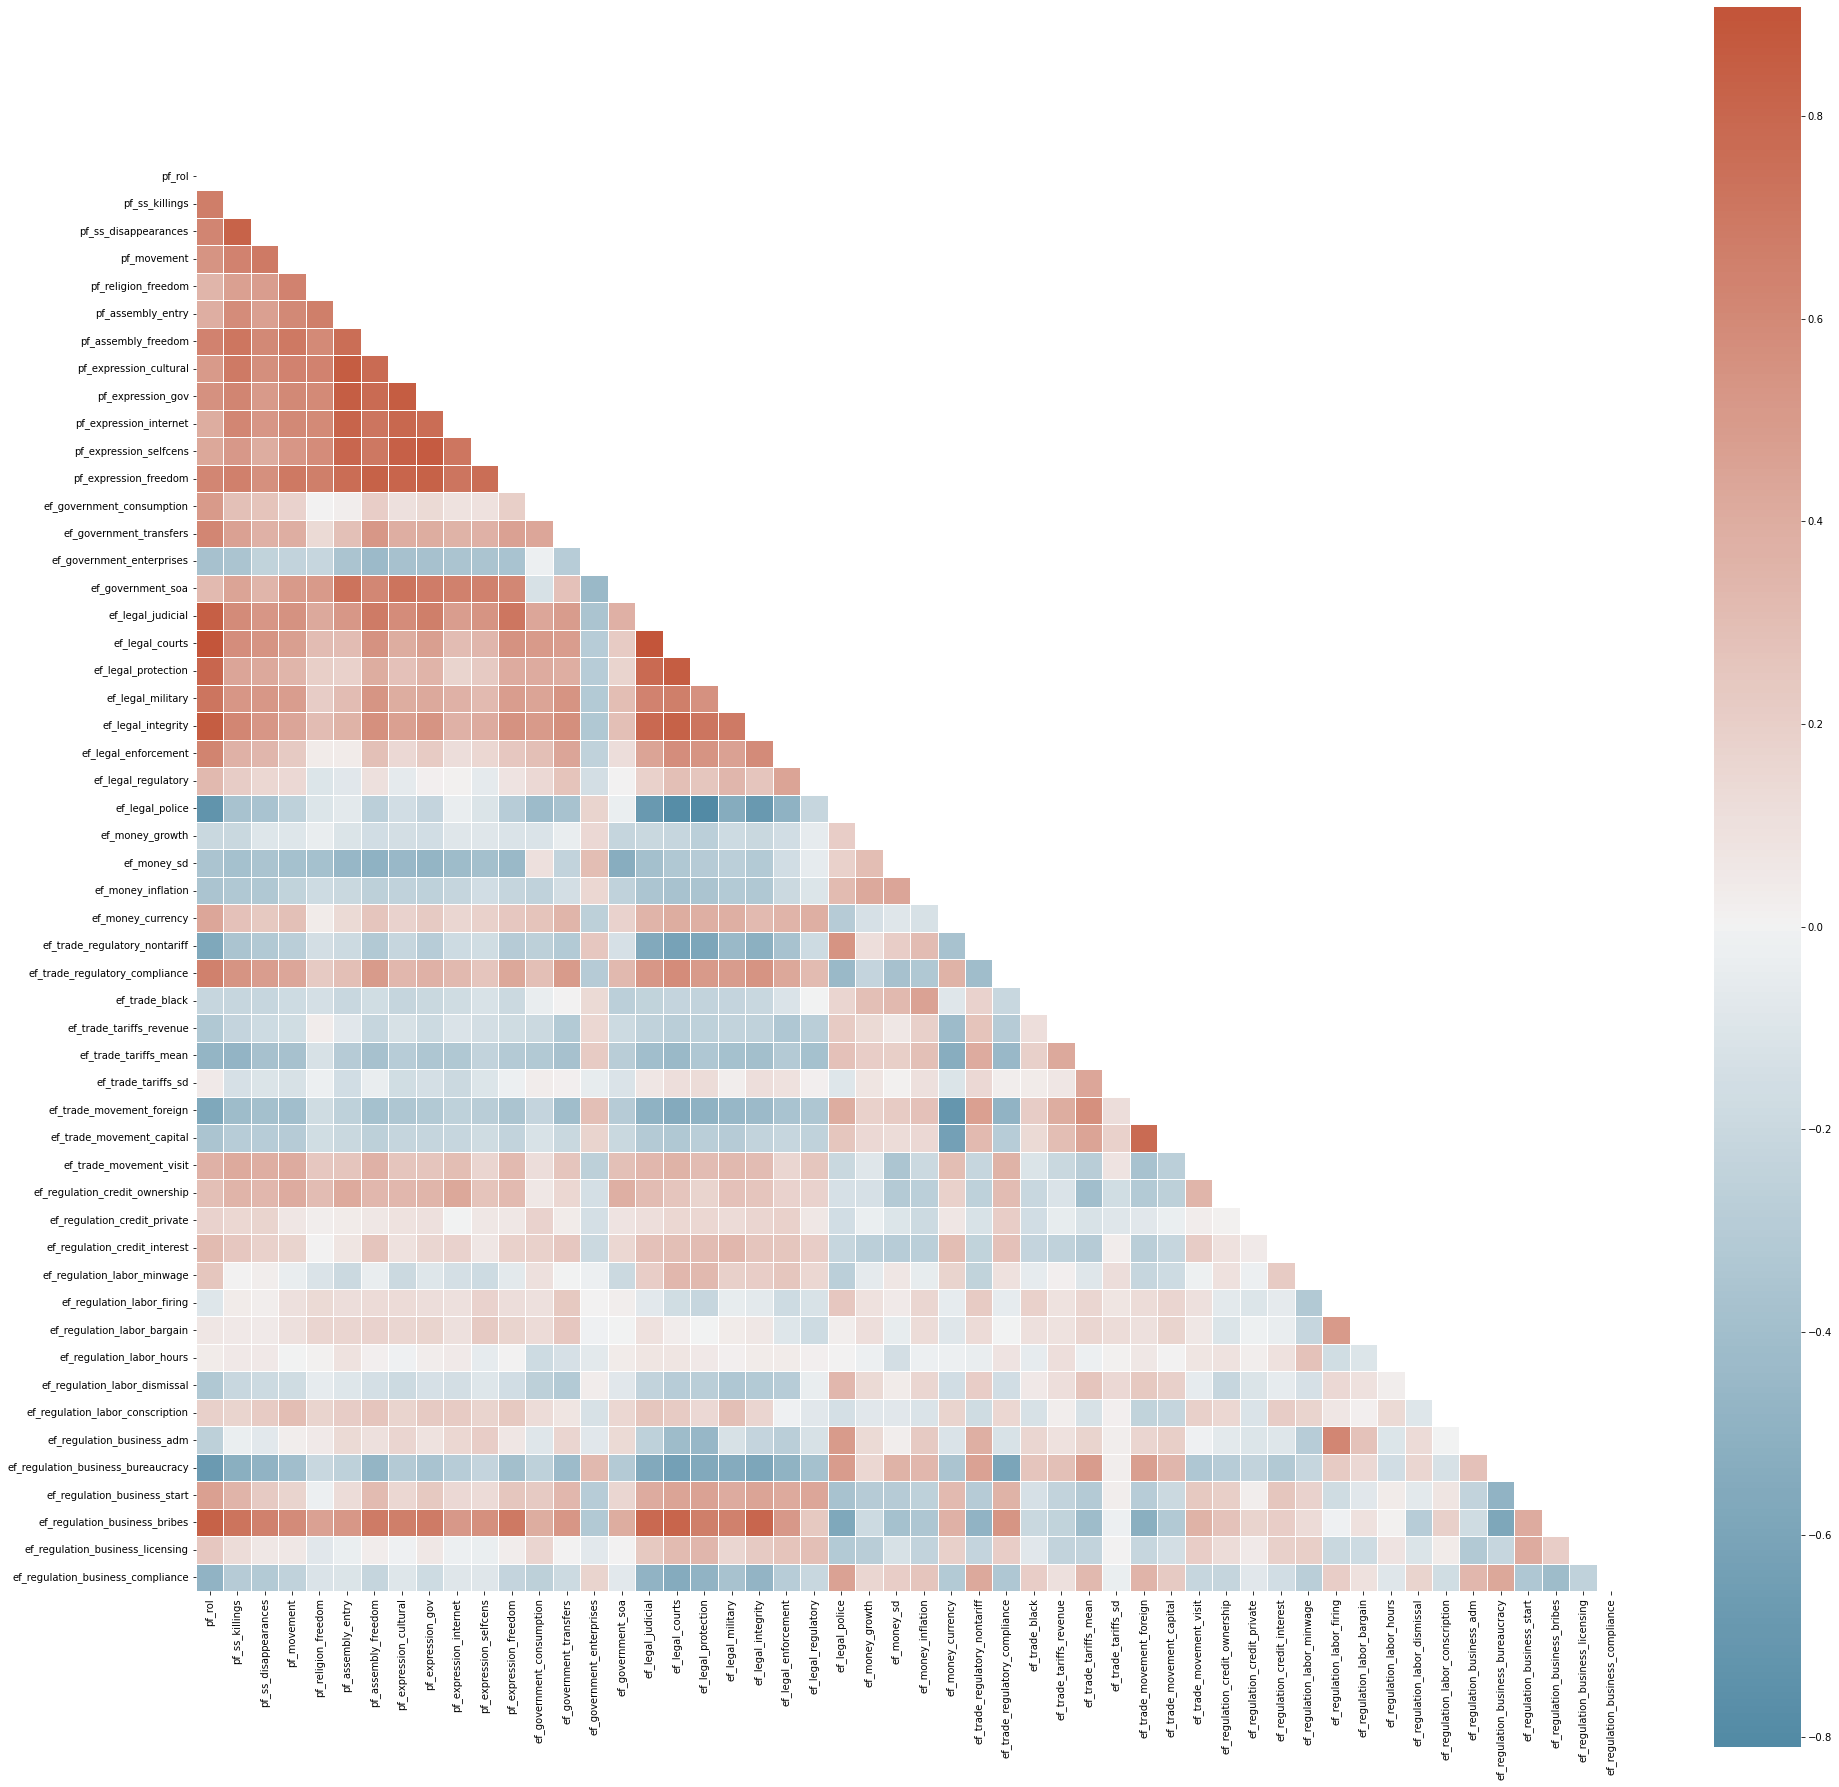

In [91]:
corr_mask = np.triu(np.ones_like(ef_pf_correlation_matrix, dtype= bool))
f, ax = plt.subplots(figsize=(32,32))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(ef_pf_correlation_matrix, mask=corr_mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

As a summary, let us get the top pairs of most and least correlated variables. Tne code below also removes the upper triangle of the correlation matrix since it is symmetric with a unit diagonal.

In [92]:
pairs_to_drop = set()
cols = ef_pf_correlation_matrix.columns
for i in range(0, ef_pf_correlation_matrix.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))

ef_pf_correlation_matrix.unstack().drop(pairs_to_drop).sort_values(kind="quicksort")

ef_legal_protection  ef_legal_police             -0.809131
ef_legal_courts      ef_legal_police             -0.786142
pf_rol               ef_legal_police             -0.732713
ef_money_currency    ef_trade_movement_foreign   -0.714576
ef_legal_judicial    ef_legal_police             -0.687682
                                                    ...   
pf_rol               ef_legal_integrity           0.854913
ef_legal_courts      ef_legal_protection          0.858716
pf_expression_gov    pf_expression_selfcens       0.862238
ef_legal_judicial    ef_legal_courts              0.895393
pf_rol               ef_legal_courts              0.907331
Length: 1326, dtype: float64

We can see that the top 5 positive correlations are these pairs

**pf_assembly_entry**        ,**pf_expression_cultural**       

**pf_expression_cultural**  , **pf_expression_gov**           

**ef_legal_courts**         ,**ef_legal_protection**          

**pf_expression_gov**       ,**pf_expression_selfcens**       

**ef_legal_judicial**       ,**ef_legal_courts**      

And the top 5  negative correltions are these pairs

**ef_legal_protection**    , **ef_legal_police**

**ef_legal_courts**      ,   **ef_legal_police**          

**ef_money_currency**       **ef_trade_movement_foreign**<

**ef_legal_judicial**       **ef_legal_police**,

**ef_legal_integrity**      **ef_legal_police**             

We can also look at the weak correlations by looking at the absolute values.

In [93]:
ef_pf_correlation_matrix.abs().unstack().drop(pairs_to_drop).sort_values(kind="quicksort")

ef_legal_regulatory             ef_trade_black                 0.000302
ef_government_transfers         ef_regulation_labor_minwage    0.000685
ef_government_soa               ef_regulation_labor_bargain    0.000875
ef_trade_regulatory_compliance  ef_regulation_labor_bargain    0.001479
ef_legal_protection             ef_regulation_labor_bargain    0.001902
                                                                 ...   
pf_rol                          ef_legal_integrity             0.854913
ef_legal_courts                 ef_legal_protection            0.858716
pf_expression_gov               pf_expression_selfcens         0.862238
ef_legal_judicial               ef_legal_courts                0.895393
pf_rol                          ef_legal_courts                0.907331
Length: 1326, dtype: float64

The weakest correlations are:

**ef_legal_regulatory**, **ef_trade_black**

**ef_government_transfers**, **ef_regulation_labor_minwage**

**ef_government_soa**, **ef_regulation_labor_bargain**

**ef_trade_regulatory_compliance**, **ef_regulation_labor_bargain**

**ef_legal_protection**, **ef_regulation_labor_bargain**

We can easily cluser sets of related variables by running Principal Component Analysis and investigating the components that arise. First, let us perform standardization. Becaus PCA is affected by variance, it would be better to perform normalization or standardization. 

We opt to use standardization so as to preserve the spread of the dataset.

We must also perform standardization for our PCA as big variances can affect the results. 

In [94]:
for col in pf_ef_features:
    eda_2[col] = standardize(eda_2[col])

eda_2

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\3607643618.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pf_rol  pf_ss_killings  pf_ss_disappearances  pf_movement  \
0    -0.131287        0.887620              0.628869     0.932314   
1    -0.087276       -0.364062              0.094339    -1.802953   
2    -1.024096       -0.107202              0.119317    -0.435319   
3     0.315117        0.361669              0.099334     0.932314   
4    -0.143862        0.826463              0.573917     0.932314   
...        ...             ...                   ...          ...   
1974  0.748946        0.924314              0.858667     0.932314   
1975 -1.357327        0.051806              0.503979    -0.435319   
1976  0.227093        0.137426              0.089343    -1.802953   
1978 -0.533680       -0.176514              0.419053    -0.435319   
1979 -0.967509       -2.851118             -1.868936    -1.802953   

      pf_religion_freedom  pf_assembly_entry  pf_assembly_freedom  \
0                0.957264           0.617036             1.087994   
1               -0.329603          -1.476089            -0.387694   
2               -0.329603          -1.272369            -0.387694   
3                0.957264           0.872684             1.087994   
4               -0.329603           0.780811             0.350150   
...                   ...                ...                  ...   
1974             0.957264           1.044448             1.087994   
1975            -0.329603          -1.112588            -0.387694   
1976            -1.616470          -1.751710            -1.125538   
1978             0.957264           0.485217            -0.387694   
1979            -0.329603          -0.773055            -1.125538   

      pf_expression_cultural  pf_expression_gov  pf_expression_internet  ...  \
0                   0.179640          -0.602174                0.049749  ...   
1                  -0.729356          -1.471426               -1.611469  ...   
2                  -0.809314          -0.381239                0.064407  ...   
3                   1.059177           0.426442                0.728894  ...   
4                   0.566804           0.611158                0.724008  ...   
...                      ...                ...                     ...  ...   
1974                1.244342           1.158063                0.733780  ...   
1975               -0.455815          -1.073019                0.010662  ...   
1976               -0.973438          -1.413476               -1.264568  ...   
1978               -0.034984          -0.236363               -0.082171  ...   
1979               -2.021307          -1.884321               -1.288997  ...   

      ef_regulation_labor_bargain  ef_regulation_labor_hours  \
0                        0.689525                   0.034243   
1                       -0.044057                  -1.017952   
2                       -0.395240                  -2.070148   
3                        2.554698                   1.086439   
4                       -0.613754                   1.086439   
...                           ...                        ...   
1974                     3.225848                   0.034243   
1975                     1.540169                  -1.017952   
1976                    -0.145510                   0.402511   
1978                    -0.044057                  -0.649684   
1979                     2.656151                  -1.017952   

      ef_regulation_labor_dismissal  ef_regulation_labor_conscription  \
0                      5.658555e-02                          0.801588   
1                     -4.421596e-01                         -0.852813   
2                     -5.614452e-02                         -1.561842   
3                      1.347857e+00                          0.801588   
4                     -9.511530e-01                         -1.561842   
...                             ...                               ...   
1974                  -2.269477e-01                          0.801588   
1975                  -2.092464e-16 

We can run PCA such that it will preserve at least a specified percentage of the variance that is found in the dataset. Here, let us set this number to 0.95 so that there is only a 5% loss of variance in our dataset.

In [95]:
pca = PCA(n_components=0.95)
pca.fit(eda_2)
pca_df = pd.DataFrame(pca.components_, columns=pf_ef_features)
pca_df

pf_rol  pf_ss_killings  pf_ss_disappearances  pf_movement  \
0  -0.219495       -0.194215             -0.174618    -0.173073   
1   0.091343       -0.074378             -0.057430    -0.134140   
2   0.146696        0.003942              0.016963    -0.019371   
3  -0.029727        0.016369             -0.013752     0.034087   
4   0.022284        0.002182              0.081725     0.099765   
5  -0.003222       -0.050971             -0.004524     0.081996   
6   0.045085        0.046278             -0.014831    -0.052193   
7  -0.004678       -0.233713             -0.365808    -0.209688   
8   0.009333       -0.002282             -0.103217    -0.135227   
9   0.028817       -0.048510              0.034044    -0.058374   
10 -0.013079        0.068222             -0.000424    -0.058213   
11 -0.011476       -0.155387             -0.206965    -0.137149   
12  0.025309       -0.128709             -0.150086    -0.098709   
13  0.036555       -0.042577             -0.018176     0.020276   
14 -0.037585       -0.113616             -0.122414    -0.041662   
15 -0.001032        0.189449              0.207811     0.058302   
16  0.035501        0.140247              0.127370    -0.070962   
17  0.035409        0.126919              0.074037    -0.037725   
18 -0.000013       -0.201017             -0.206081     0.045614   
19  0.052211        0.023132              0.030653    -0.031551   
20  0.012439        0.051668             -0.072264    -0.264953   
21  0.001444        0.055165              0.008727     0.051729   
22 -0.003036       -0.184729             -0.179122     0.087713   
23  0.042959        0.042571             -0.091611    -0.024149   
24  0.021890       -0.059535             -0.068042     0.139327   
25  0.014963       -0.175519             -0.151058     0.261292   
26 -0.068729        0.027006              0.034106     0.133317   
27 -0.018424        0.108848              0.149081     0.007979   
28  0.063721       -0.091306              0.133082     0.099818   
29 -0.031730        0.013649             -0.131577    -0.267394   
30  0.005108        0.183765              0.042540    -0.205824   
31  0.038789        0.018130              0.003821    -0.117634   
32  0.054434       -0.185131             -0.115266     0.013558   
33  0.008207       -0.030959              0.016664    -0.276343   
34  0.003917        0.077984             -0.016091    -0.217976   

    pf_religion_freedom  pf_assembly_entry  pf_assembly_freedom  \
0             -0.124398          -0.155536            -0.196146   
1             -0.221024          -0.265516            -0.164824   
2             -0.013968          -0.090235             0.036877   
3             -0.139979          -0.062056             0.004238   
4              0.134942           0.061768            -0.043955   
5              0.079698           0.009903             0.059904   
6              0.004357           0.055989             0.032328   
7             -0.059077           0.091608             0.018252   
8             -0.219737           0.021991             0.046083   
9              0.001478          -0.052896            -0.013344   
10            -0.076472           0.063505             0.033886   
11            -0.068764           0.039637            -0.100755   
12            -0.096444           0.003711             0.016350   
13             0.053736          -0.014020            -0.002211   
14            -0.086777           0.073892            -0.012490   
15            -0.047066          -0.099906             0.063790   
16            -0.103894           0.004752            -0.040546   
17             0.163696          -0.030822             0.036652   
18             0.063675           0.017357             0.058991   
19             0.002795          -0.038059            -0.041580   
20            -0.158741           0.112206             0.002325   
21             0.081828           0.069293             0.021205   
22             0.218000           0.008275          

We get 35 components out of our original 52. Because of our choice of expected variance, this might indicate that the dataset has features that are loosely clusterable since we have many components.

Let us visualize each component based on their contribution to the explained variance.

<BarContainer object of 35 artists>

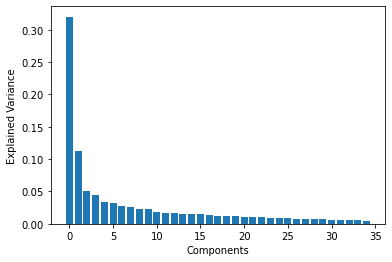

In [96]:
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.bar([i for i in range(0, pca_df.shape[0])], pca.explained_variance_ratio_)

We notice an exponential distribution on the explained variance per component. We might be able to conclude that most features form their own small clusters with each other.

For each component, let us display the top 3 contributing features and their singular values. Effectively, this will give us an overview of what features have been grouped together. We ought to pay attention, as well, to the first few components since these have more significant contributions.

In [97]:
for x in range(0, pca_df.shape[0]):
    sorted = pca_df.iloc[x].abs().sort_values(ascending=False)
    print("Component " + str(x) + ":\n", sorted[0: 3])

Component 0:
 pf_rol                           0.219495
ef_regulation_business_bribes    0.213529
ef_legal_judicial                0.212597
Name: 0, dtype: float64
Component 1:
 pf_assembly_entry             0.265516
ef_regulation_business_adm    0.246439
pf_expression_selfcens        0.244620
Name: 1, dtype: float64
Component 2:
 ef_regulation_labor_bargain    0.341690
ef_regulation_labor_firing     0.279359
ef_government_consumption      0.274666
Name: 2, dtype: float64
Component 3:
 ef_money_currency            0.349770
ef_trade_tariffs_revenue     0.279025
ef_trade_movement_capital    0.265164
Name: 3, dtype: float64
Component 4:
 ef_money_sd                     0.297153
ef_trade_tariffs_sd             0.287069
ef_regulation_business_start    0.283185
Name: 4, dtype: float64
Component 5:
 ef_regulation_labor_conscription    0.359916
ef_regulation_credit_private        0.329448
ef_regulation_labor_minwage         0.326945
Name: 5, dtype: float64
Component 6:
 ef_regulation_labor_con

It's interesting to note how for component 3, for example, features that are intuitively related are indeed "clustered" together (i.e., **ef_money_currency**, **ef_trade_tariffs_revenue**, **ef_trade_movement_capital**).

Let us visualize all components using a heatmap.

<AxesSubplot:>

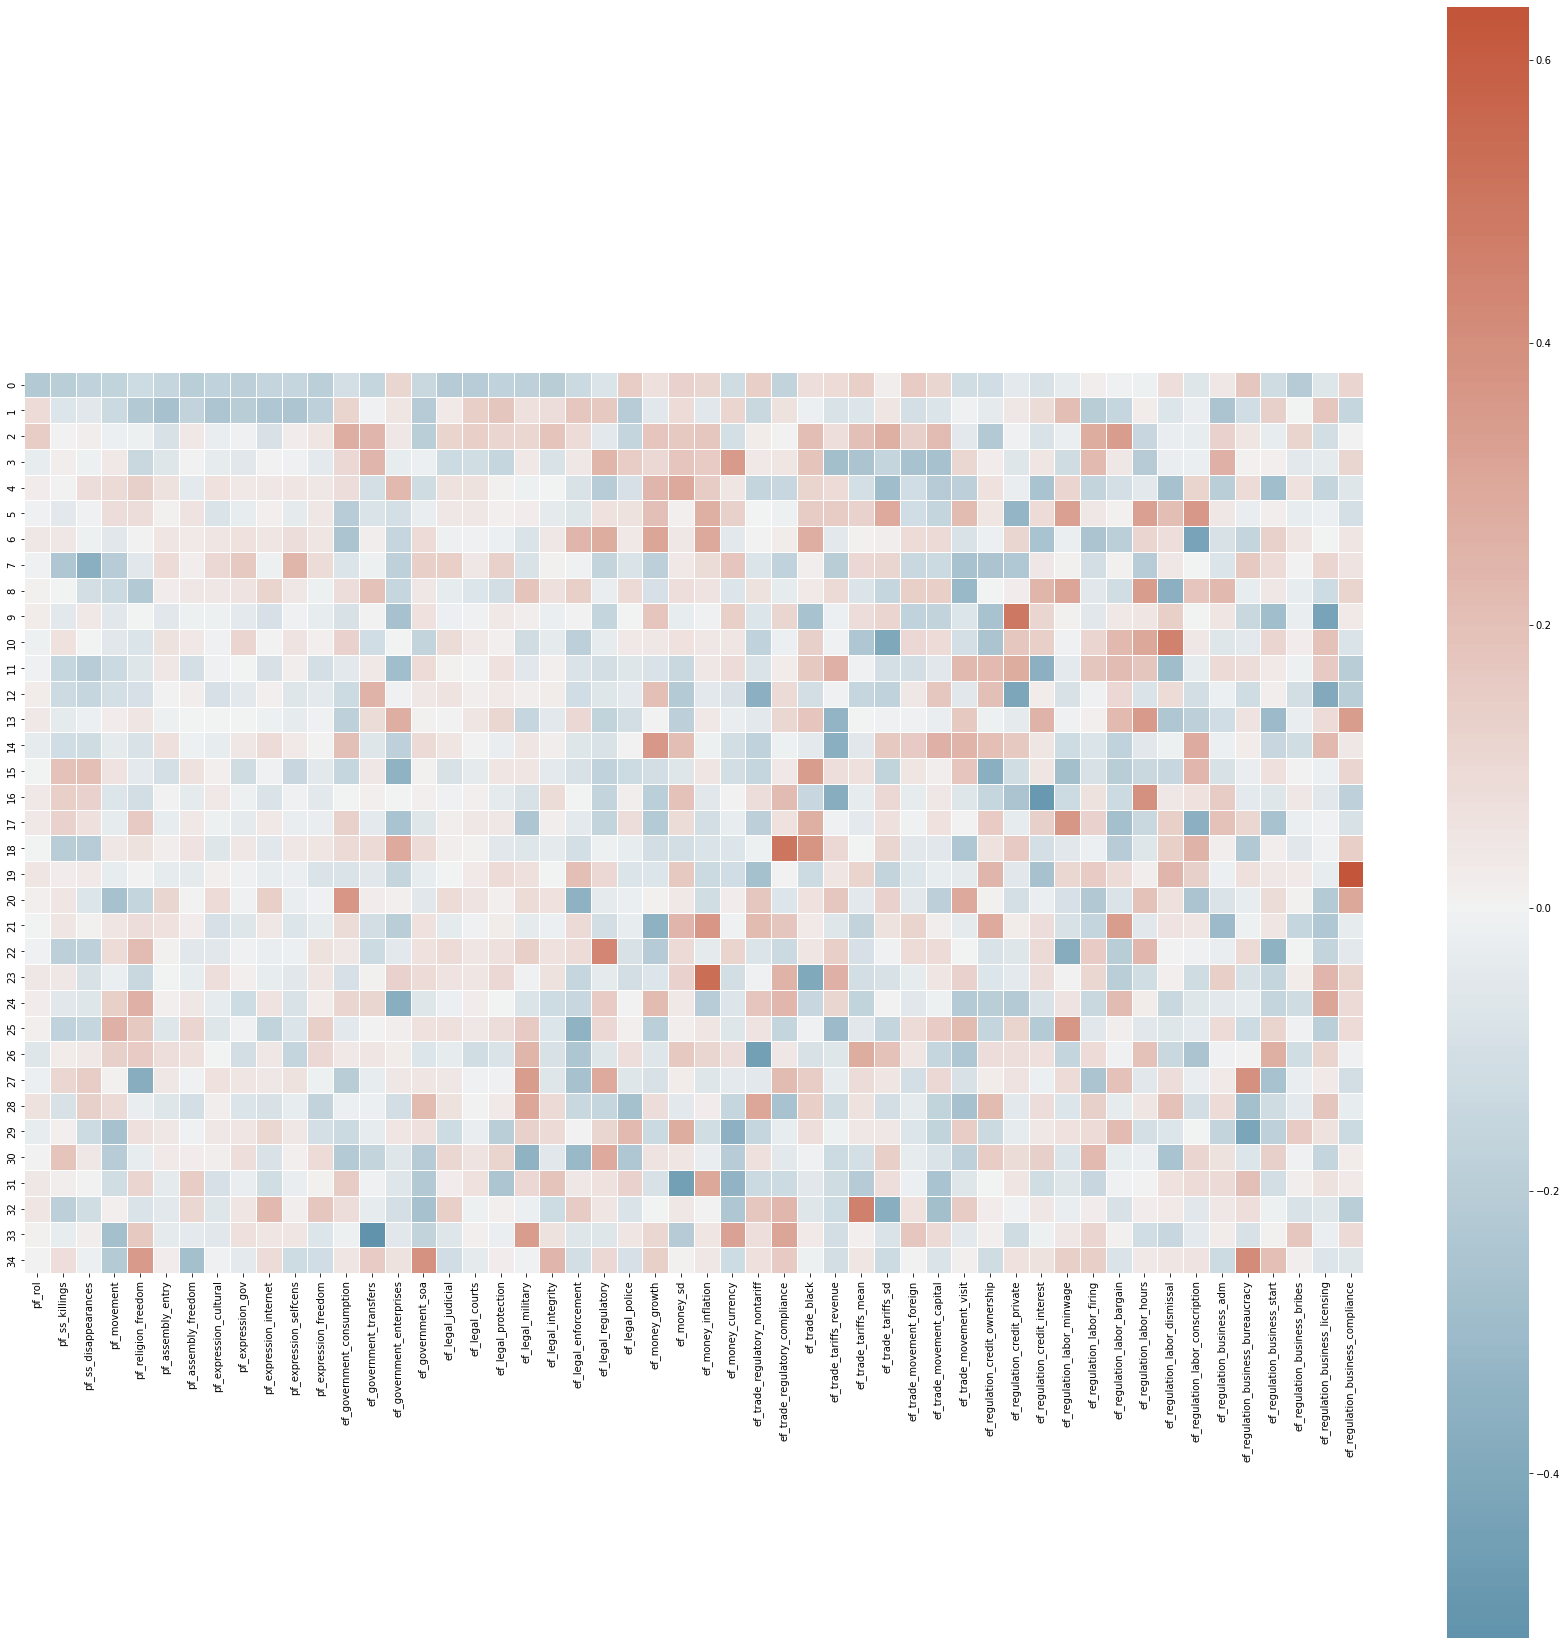

In [98]:
f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pca_df, cmap=cmap, center=0,
            square=True, linewidths=.5) 

From component 0, for example, we can conclude that most of the pf_features are correlated with each other. This matches with what we've seen in the corr plot.

It also appears that from component 1, all the ef_legal subfeatures are correlated with each other, which matches our intuition that suvfactors are correlated. We can also see a similar phenomenon with ef_trade subfactors, and ef_regulation credit subfactors.

All in all, we can broadly conclude that most subfactors are correlated within each other. 

If we are interested in showing only the most important features (i.e., only considering magnitude), let us apply a crude filter to our dataframe. We can output the square of the hyperbolic tangent of the pca_df 

<AxesSubplot:>

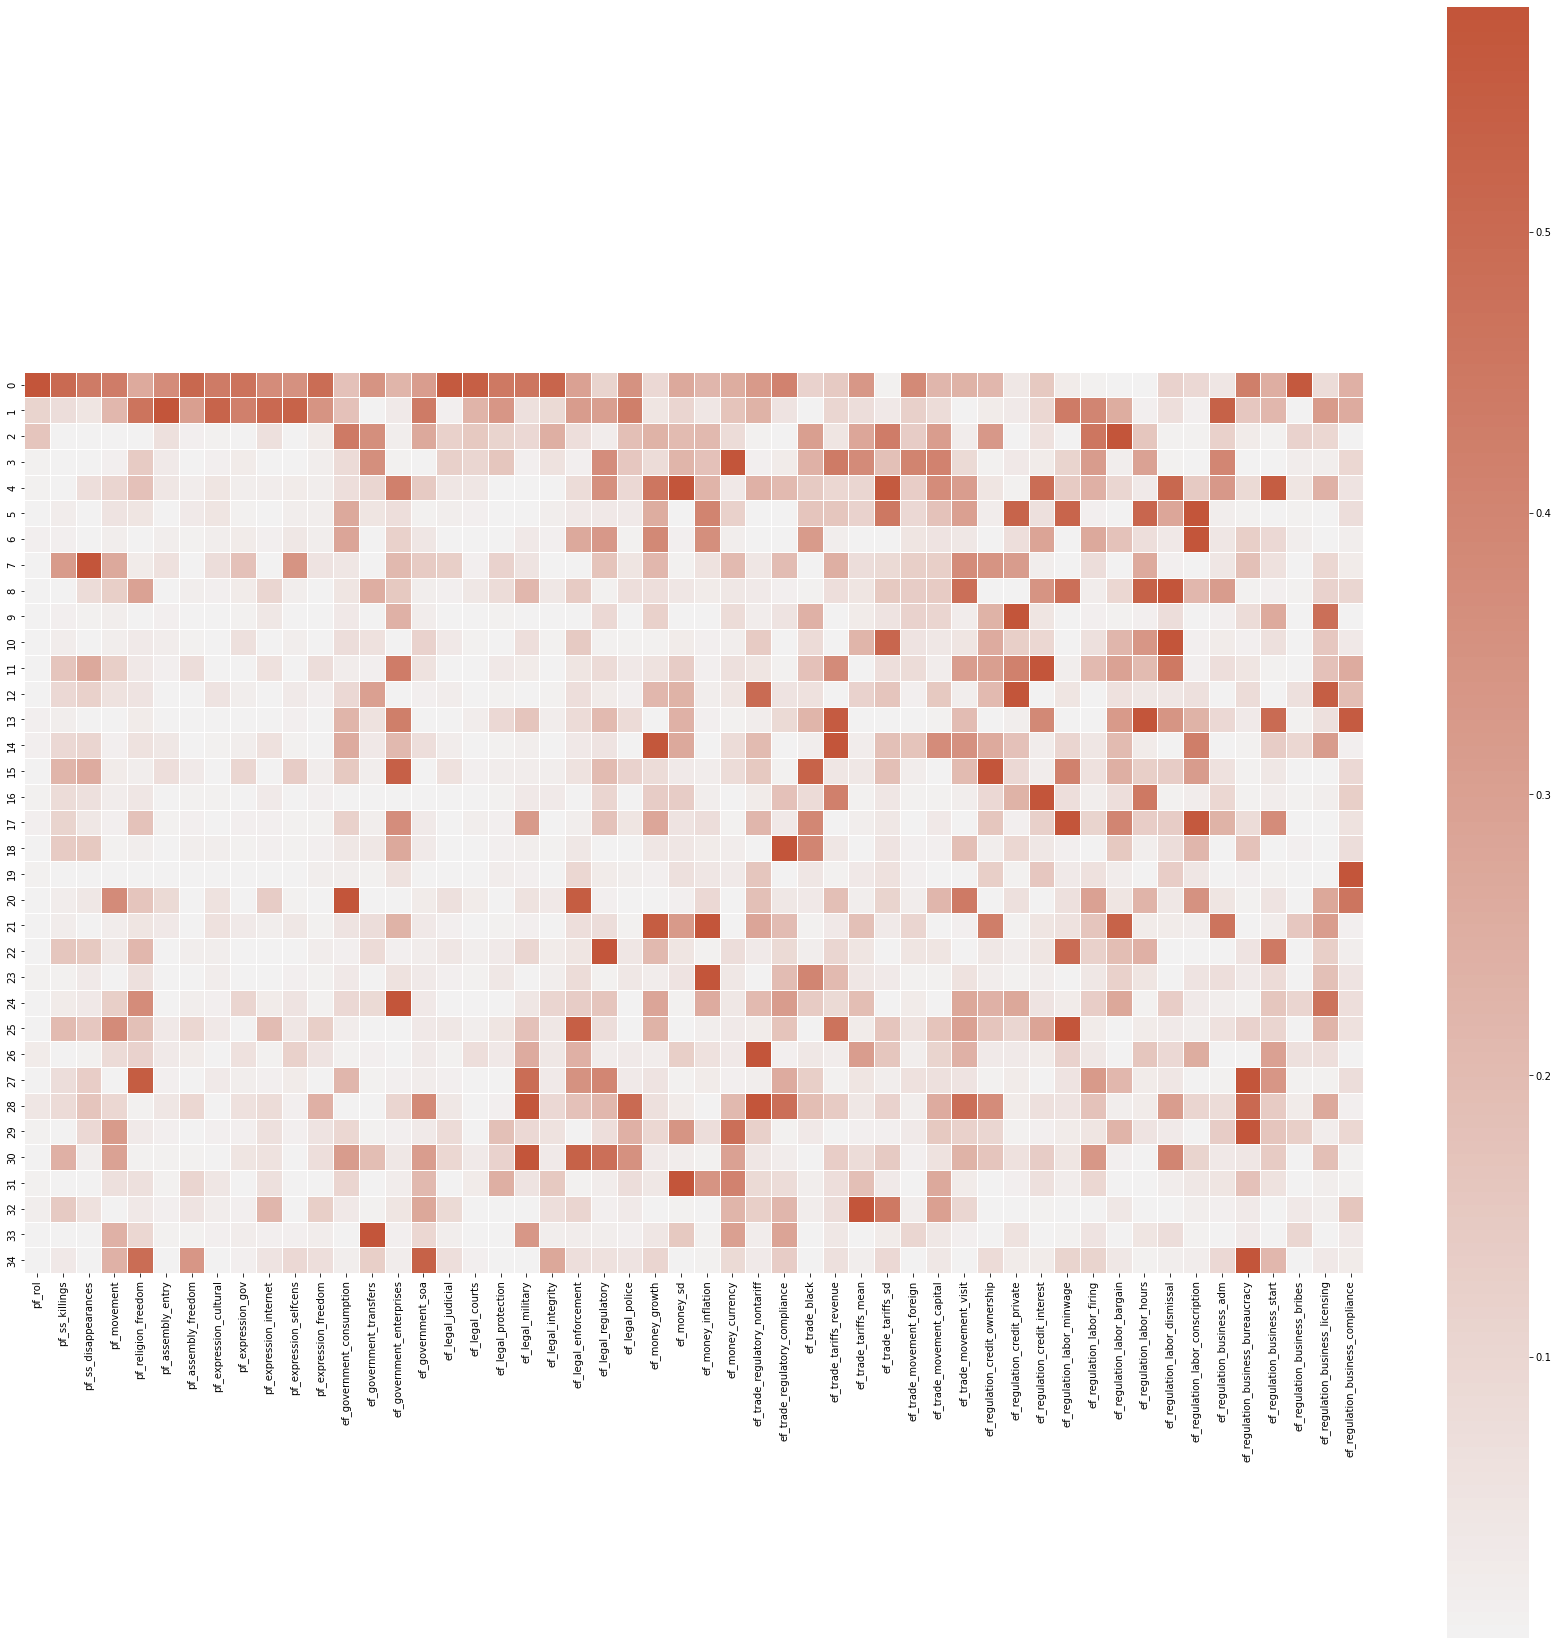

In [99]:
scaled_pca_df = pca_df

for x in range(0, pca_df.shape[0]):
    maximum = max(scaled_pca_df.iloc[x].abs())
    scaled_pca_df.iloc[x] /= maximum
    scaled_pca_df.iloc[x] = np.square(np.tanh(scaled_pca_df.iloc[x]))

f, ax = plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(scaled_pca_df, cmap=cmap, center=0,
            square=True, linewidths=.5) 

From the above plot we can better see which features contribute the most to each component. Again, it appears most of the pf features contribute together, as shown in components 1 and 2. For ef features, it varies between tables but we can observe as well that most subfactors contriubte together.

## **EDA Question 3**
Question: Separating countries based on their average hf_indices, what is the distribution of the most correlated pf and ef factors among these groups.



Our PCA results indicate that we have multiple components per feature, but to simplify our analysis and visualization let us return to using our results from the correlation matrix. We analyze the top 3 most correlated feature pairs. First, let us define a helper function to transform our dataset for us. We want only the hf_score, and two chosen features

In [100]:
def groupby_feature_pair(first, second):
    # Average hf_score for each country in the dataset
    country_hf_score = hfi_dataset.groupby(['countries', 'region'])['hf_score', first, second].mean().reset_index()

    # Sort the countries based on their average hf_score
    country_hf_score = country_hf_score.sort_values(by=['hf_score'], ascending=False)

    return country_hf_score

Let us define another helper function for this EDA that will plot our dataset given two chosen features. The countries in the upper and lower half ranks based on hf_scores are shown in different colors

In [101]:
def plot_feature_vs_feature(first, second):
    data = groupby_feature_pair(first, second)
    HALFWAY_IDX = data.shape[0] // 2

    upper = data.iloc[:HALFWAY_IDX, :]
    lower = data.iloc[HALFWAY_IDX:,:]

    plt.figure(figsize= (10, 10))
    plt.xlabel(first)
    plt.ylabel(second)
    plt.scatter(upper[first], upper[second], label="Upper")
    plt.scatter(lower[first], lower[second], label="Lower")

    plt.legend()

Now let us perform plotting, starting with **pf_rol** vs **ef_legal_integrity**. For this analysis, when we say a low country we mean countries in the lower half while a high country is a country in the upper half if we rank by average hf_score

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\913819502.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



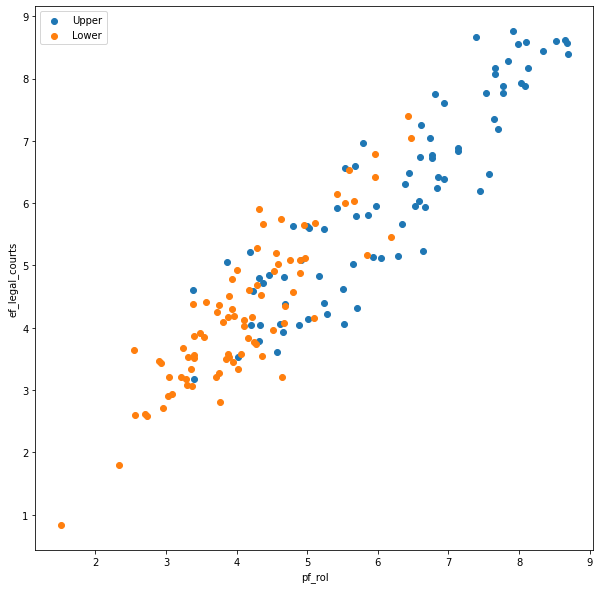

In [102]:
plot_feature_vs_feature("pf_rol", "ef_legal_courts")

We can observe that lower countries have low **ef_legal_integrity** and a low **pf_rol**, while high countries have a high value for both. Both clusters appear to overlap with each other, however, which might indicate that this feature pair alone is not a good predictor for determining if a country is a high or alow country.

We turn to our next feature pair

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\913819502.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



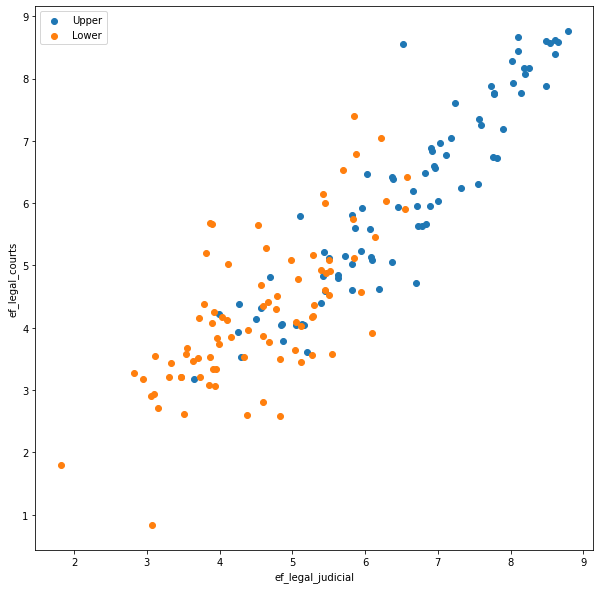

In [103]:
plot_feature_vs_feature("ef_legal_judicial", "ef_legal_courts")

Here we can see a similar trend as before where low countries have low values for both and high countries have high values for both, however it appers that there is a point (at around 8-9 **ef_legal_judicial**), where we can only see high countries.

We can plot the next pair

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\913819502.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



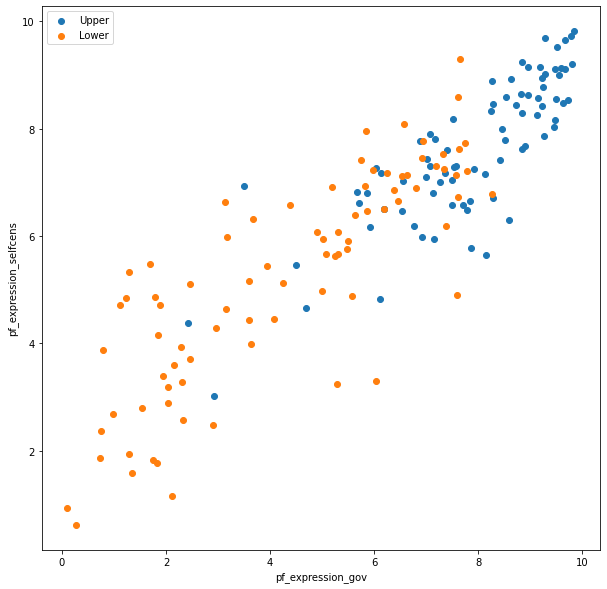

In [104]:
plot_feature_vs_feature("pf_expression_gov", "pf_expression_selfcens")

Again, we observe a similar trend where low countries tend to have low ratings for both and vice versa for high countries. In addition to a section at around 9 **pf_expression_gov** where there is a cluster of high countries, there are also low countries at around 2-3 **pf_expression_gov**.

What we can conclude from this analysis is that we can delineate regions in the distribution for each pf nd ef factor. However, we must recognize that we are only viewing a 2d slice of potentially 52 dimensional space so in reality the delineation between each variable may not be obvious.

# **Research Question**

Based on the conducted EDA, the group answered the following research question.
**How do the different ef and pf factors affect the hf_score ?**


### **Connections to the EDA**
EDA1 showed that we have seen that different regions and different countries have different **hf_scores**. While some regions such as Western Europe have little variation in their **hf_scores**, other regions such as Subsaharan Africa have high variation. We can also observe different trends for the **hf_score** for each country.

EDA2 showed the correlation between each ef nd pf factor with each other. However, it also revealed that we can reduce the dimensionality of our dataset to just one variable with only a 5% loss in variance. This will also inform us which features or components should we keep in our dataset.

EDA3 showed that there are different ways we can cluster the dataset based on the results of EDA2. It presents a crude view of the relationship between each ef and pf_factor with the hf_score of the country. 

The research question is an extension of EDA3, wherein we seek to understand the trend of the **hf_score** using only the available ef and pf scores as data. 

### **Significance**

The researchers believe that the question posed for the study is significant because it better informs policy makers on what economic and personal freedom factors should be focused on to better build a more free society.

Furthermore, the answer to this research question presents a model for predicting the global trends in human freedoms, which may also inform policy makers with their decisions.

# Phase 2

For this phase, the group aims to answer the following research question: **How do the different ef and pf factors affect the hf_score ?**

## Preprocessing

First we create a dataset that contains all `pf` and `ef` features to be analyzed.

In [105]:
pf_ef_features = pf_features + ef_features
pca_dataset = hfi_dataset[pf_ef_features]
pca_dataset

pf_rol  pf_ss_killings  pf_ss_disappearances  pf_movement  \
0       5.00            9.72                  9.36         10.0   
1       5.07            6.65                  8.29          5.0   
2       3.58            7.28                  8.34          7.5   
3       5.71            8.43                  8.30         10.0   
4       4.98            9.57                  9.25         10.0   
...      ...             ...                   ...          ...   
1974    6.40            9.81                  9.82         10.0   
1975    3.05            7.67                  9.11          7.5   
1976    5.57            7.88                  8.28          5.0   
1978    4.36            7.11                  8.94          7.5   
1979    3.67            0.55                  4.36          5.0   

      pf_religion_freedom  pf_assembly_entry  pf_assembly_freedom  \
0                    10.0               8.40                 10.0   
1                     7.5               3.16                  5.0   
2                     7.5               3.67                  5.0   
3                    10.0               9.04                 10.0   
4                     7.5               8.81                  7.5   
...                   ...                ...                  ...   
1974                 10.0               9.47                 10.0   
1975                  7.5               4.07                  5.0   
1976                  5.0               2.47                  2.5   
1978                 10.0               8.07                  5.0   
1979                  7.5               4.92                  2.5   

      pf_expression_cultural  pf_expression_gov  pf_expression_internet  ...  \
0                       7.34               4.53                    8.51  ...   
1                       5.18               2.13                    5.11  ...   
2                       4.99               5.14                    8.54  ...   
3                       9.43               7.37                    9.90  ...   
4                       8.26               7.88                    9.89  ...   
...                      ...                ...                     ...  ...   
1974                    9.87               9.39                    9.91  ...   
1975                    5.83               3.23                    8.43  ...   
1976                    4.60               2.29                    5.82  ...   
1978                    6.83               5.54                    8.24  ...   
1979                    2.11               0.99                    5.77  ...   

      ef_regulation_labor_bargain  ef_regulation_labor_hours  \
0                           3.652                        8.0   
1                           3.088                        6.0   
2                           2.818                        4.0   
3                           5.086                       10.0   
4                           2.650                       10.0   
...                           ...                        ...   
1974                        5.602                        8.0   
1975                        4.306                        6.0   
1976                        3.010                        8.7   
1978                        3.088                        6.7   
1979                        5.164                        6.0   

      ef_regulation_labor_dismissal  ef_regulation_labor_conscription  \
0                         21.460000                              10.0   
1                         12.992000                               3.0   
2                         19.546000                               0.0   
3                         43.384000                              10.0   
4                          4.350000                               0.0   
...                             ...                               ...   
1974                      16.646000                              10.0   
1975                      20.499256                       

Next we begin to do PCA on the factors so that we may determine which factors are most significant. We begin PCA by first standardizing the dataset since PCA is affected by the scale of the data.

In [106]:
for col in pf_ef_features:
    pca_dataset[col] = standardize(pca_dataset[col])

pca = PCA(n_components=0.95)
pca.fit(pca_dataset)
pca_df = pd.DataFrame(pca.components_, columns=pf_ef_features)
pca_df

C:\Users\Andrei\AppData\Local\Temp\ipykernel_5268\724363111.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pf_rol  pf_ss_killings  pf_ss_disappearances  pf_movement  \
0  -0.219495       -0.194215             -0.174618    -0.173073   
1   0.091343       -0.074378             -0.057430    -0.134140   
2   0.146696        0.003942              0.016963    -0.019371   
3  -0.029727        0.016369             -0.013752     0.034087   
4   0.022284        0.002182              0.081725     0.099765   
5  -0.003222       -0.050971             -0.004524     0.081996   
6   0.045085        0.046278             -0.014831    -0.052193   
7  -0.004678       -0.233713             -0.365808    -0.209688   
8   0.009333       -0.002282             -0.103217    -0.135227   
9   0.028817       -0.048510              0.034044    -0.058374   
10 -0.013079        0.068222             -0.000424    -0.058213   
11 -0.011476       -0.155387             -0.206965    -0.137149   
12  0.025309       -0.128709             -0.150086    -0.098709   
13  0.036555       -0.042577             -0.018176     0.020276   
14 -0.037585       -0.113616             -0.122414    -0.041662   
15 -0.001032        0.189449              0.207811     0.058302   
16  0.035501        0.140247              0.127370    -0.070962   
17  0.035409        0.126919              0.074037    -0.037725   
18 -0.000013       -0.201017             -0.206081     0.045614   
19  0.052211        0.023132              0.030653    -0.031551   
20  0.012439        0.051668             -0.072264    -0.264953   
21  0.001444        0.055165              0.008727     0.051729   
22 -0.003036       -0.184729             -0.179122     0.087713   
23  0.042959        0.042571             -0.091611    -0.024149   
24  0.021890       -0.059535             -0.068042     0.139327   
25  0.014963       -0.175519             -0.151058     0.261292   
26 -0.068729        0.027006              0.034106     0.133317   
27 -0.018424        0.108848              0.149081     0.007979   
28  0.063721       -0.091306              0.133082     0.099818   
29 -0.031730        0.013649             -0.131577    -0.267394   
30  0.005108        0.183765              0.042540    -0.205824   
31  0.038789        0.018130              0.003821    -0.117634   
32  0.054434       -0.185131             -0.115266     0.013558   
33  0.008207       -0.030959              0.016664    -0.276343   
34  0.003917        0.077984             -0.016091    -0.217976   

    pf_religion_freedom  pf_assembly_entry  pf_assembly_freedom  \
0             -0.124398          -0.155536            -0.196146   
1             -0.221024          -0.265516            -0.164824   
2             -0.013968          -0.090235             0.036877   
3             -0.139979          -0.062056             0.004238   
4              0.134942           0.061768            -0.043955   
5              0.079698           0.009903             0.059904   
6              0.004357           0.055989             0.032328   
7             -0.059077           0.091608             0.018252   
8             -0.219737           0.021991             0.046083   
9              0.001478          -0.052896            -0.013344   
10            -0.076472           0.063505             0.033886   
11            -0.068764           0.039637            -0.100755   
12            -0.096444           0.003711             0.016350   
13             0.053736          -0.014020            -0.002211   
14            -0.086777           0.073892            -0.012490   
15            -0.047066          -0.099906             0.063790   
16            -0.103894           0.004752            -0.040546   
17             0.163696          -0.030822             0.036652   
18             0.063675           0.017357             0.058991   
19             0.002795          -0.038059            -0.041580   
20            -0.158741           0.112206             0.002325   
21             0.081828           0.069293             0.021205   
22             0.218000           0.008275          

Now that our features are represented as components, we will pick out the best components that explain the majority of the variance in our data. We do this by checking their variance. In this case, only 8 components passed our decided explained variance ratio tolerance.

In [107]:
#Keep only up to those above 0.025

EXPLAINED_VARIANCE_TOLERANCE = 0.025

kept_components = 0
for x in pca.explained_variance_ratio_:
    if x < EXPLAINED_VARIANCE_TOLERANCE:
        break
    kept_components +=1
kept_components

8

We then proceed to keep these components.

In [108]:
pca_df = pca_df[0:kept_components]
pca_df

pf_rol  pf_ss_killings  pf_ss_disappearances  pf_movement  \
0 -0.219495       -0.194215             -0.174618    -0.173073   
1  0.091343       -0.074378             -0.057430    -0.134140   
2  0.146696        0.003942              0.016963    -0.019371   
3 -0.029727        0.016369             -0.013752     0.034087   
4  0.022284        0.002182              0.081725     0.099765   
5 -0.003222       -0.050971             -0.004524     0.081996   
6  0.045085        0.046278             -0.014831    -0.052193   
7 -0.004678       -0.233713             -0.365808    -0.209688   

   pf_religion_freedom  pf_assembly_entry  pf_assembly_freedom  \
0            -0.124398          -0.155536            -0.196146   
1            -0.221024          -0.265516            -0.164824   
2            -0.013968          -0.090235             0.036877   
3            -0.139979          -0.062056             0.004238   
4             0.134942           0.061768            -0.043955   
5             0.079698           0.009903             0.059904   
6             0.004357           0.055989             0.032328   
7            -0.059077           0.091608             0.018252   

   pf_expression_cultural  pf_expression_gov  pf_expression_internet  ...  \
0               -0.173964          -0.183368               -0.156155  ...   
1               -0.243432          -0.204932               -0.235223  ...   
2               -0.025131          -0.010179               -0.089470  ...   
3               -0.035457          -0.053730                0.005603  ...   
4                0.065234           0.035317                0.044078  ...   
5               -0.079744          -0.032662                0.011656  ...   
6                0.049954           0.067666                0.047796  ...   
7                0.101181           0.165397               -0.015362  ...   

   ef_regulation_labor_bargain  ef_regulation_labor_hours  \
0                    -0.008612                  -0.013351   
1                    -0.147215                   0.027316   
2                     0.341690                  -0.145755   
3                     0.042227                  -0.211682   
4                    -0.099456                  -0.050533   
5                     0.008715                   0.324387   
6                    -0.188200                   0.114752   
7                     0.010300                  -0.208256   

   ef_regulation_labor_dismissal  ef_regulation_labor_conscription  \
0                       0.078122                         -0.069424   
1                      -0.071514                         -0.025771   
2                      -0.027826                         -0.032138   
3                      -0.027115                         -0.022585   
4                      -0.265549                          0.120121   
5                       0.211383                          0.359916   
6                       0.078458                         -0.426139   
7                       0.041286                          0.001546   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                    0.046533                            0.170902   
1                   -0.246439                           -0.111621   
2                    0.124670                            0.052208   
3                    0.259401                            0.007688   
4                   -0.193827                            0.091667   
5                    0.043294                           -0.027487   
6                   -0.090218                           -0.159737   
7                   -0.076158                            0.167895   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                     -0.120813                      -0.213529   
1                      0.133926                      -0.000545   
2                     -0.031570                       0.120659   
3                      0.013978                      -

We then transform the original data with the PCA components. This is done using a simple matrix multiplication with the component-features matrix.

In [109]:
transformed_pca_dataset = pca_dataset.dot(pca_df.transpose())
transformed_pca_dataset

0         1         2         3         4         5         6  \
0    -1.688713 -0.811534 -2.181424  0.448505 -0.251331 -0.159161 -0.784513   
1     5.400863  1.896885  3.776656  0.359999  0.697220 -0.661296  1.418063   
2     4.933682 -0.666791  1.180983 -0.076801  1.057775 -1.116133  0.899320   
3     0.782310 -4.339502  3.752490  2.481002  1.619711  4.201501  2.306562   
4    -2.839124  0.448707 -2.689592  0.292004 -0.756065 -0.300755  1.549098   
...        ...       ...       ...       ...       ...       ...       ...   
1974 -2.706317 -3.115994  2.210701  0.935322  1.680095  1.188209 -0.963109   
1975  7.232097 -3.901203  3.666596  5.107402  1.736462  0.363643  2.822999   
1976  5.019686  1.864667  1.373859 -0.522564 -1.915259  0.480966  2.481769   
1978 -0.103939 -0.088813 -0.447002  0.030492  1.417710  2.008662  0.362914   
1979  9.968939 -2.325147  5.520270 -0.170304  3.270956  3.458240  1.796139   

             7  
0    -1.229190  
1     0.627197  
2     0.382204  
3    -0.538045  
4    -0.531936  
...        ...  
1974  0.821320  
1975 -2.255879  
1976 -0.693321  
1978  1.643787  
1979 -1.738094  

[1867 rows x 8 columns]

We can now add back the labels after processing our features.

In [110]:
processed_dataset = transformed_pca_dataset
processed_dataset['hf_score'] = hfi_dataset["hf_score"]
processed_dataset['year'] = hfi_dataset["year"]
processed_dataset['region'] = hfi_dataset["region"]
processed_dataset['countries'] = hfi_dataset["countries"]
processed_dataset

0         1         2         3         4         5         6  \
0    -1.688713 -0.811534 -2.181424  0.448505 -0.251331 -0.159161 -0.784513   
1     5.400863  1.896885  3.776656  0.359999  0.697220 -0.661296  1.418063   
2     4.933682 -0.666791  1.180983 -0.076801  1.057775 -1.116133  0.899320   
3     0.782310 -4.339502  3.752490  2.481002  1.619711  4.201501  2.306562   
4    -2.839124  0.448707 -2.689592  0.292004 -0.756065 -0.300755  1.549098   
...        ...       ...       ...       ...       ...       ...       ...   
1974 -2.706317 -3.115994  2.210701  0.935322  1.680095  1.188209 -0.963109   
1975  7.232097 -3.901203  3.666596  5.107402  1.736462  0.363643  2.822999   
1976  5.019686  1.864667  1.373859 -0.522564 -1.915259  0.480966  2.481769   
1978 -0.103939 -0.088813 -0.447002  0.030492  1.417710  2.008662  0.362914   
1979  9.968939 -2.325147  5.520270 -0.170304  3.270956  3.458240  1.796139   

             7  hf_score  year                         region      countries  
0    -1.229190      8.14  2019                 Eastern Europe        Albania  
1     0.627197      5.26  2019     Middle East & North Africa        Algeria  
2     0.382204      6.09  2019             Sub-Saharan Africa         Angola  
3    -0.538045      7.38  2019  Latin America & the Caribbean      Argentina  
4    -0.531936      8.20  2019        Caucasus & Central Asia        Armenia  
...        ...       ...   ...                            ...            ...  
1974  0.821320      8.36  2008  Latin America & the Caribbean        Uruguay  
1975 -2.255879      5.44  2008  Latin America & the Caribbean  Venezuela, RB  
1976 -0.693321      5.97  2008                     South Asia        Vietnam  
1978  1.643787      7.32  2008             Sub-Saharan Africa         Zambia  
1979 -1.738094      5.20  2008             Sub-Saharan Africa       Zimbabwe  

[1867 rows x 12 columns]

## Statistical Inference

In this section, we perform some statistical inferencing to verify some assumptions that we have had. 

First, we verify that if we cluster by regions, then there is a significant difference in the **hf_scores** per year. The implication of this is that we can consider region as an additional factor in our data modelling and we may be able to cluster on the regions. 

H0: There is no significant difference in the means of the **hf_scores** for each country in each region per year.

Ha: There is a significant difference in the means of the **hf_scores** for each country in each region per year.
p-value = 0.05

The test we will use is Tukey's HSD since, even if we performed ANOVA we will only be able to determine whether each group mean has been sampled from the same distribution. In Tukey's HSD test, we compare pairwise. Our distribution satisfies the core assumptions of this test since it is normally distributed, with independent samples and equal variances (since they have all been scaled down to a range of 0 to 10).

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [112]:
tukey = pairwise_tukeyhsd(alpha=0.05, endog=processed_dataset["hf_score"], groups=processed_dataset["region"])
tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Inspecting the results, we see most of the pairs have significantly different distriubtions (i.e., they have True in the Reject column). We list, those that have no significant difference for the sake of brevity.

* Caucasus & Central Asia	       ,South Asia	
* Caucasus & Central Asia          ,Sub-Saharan Africa
* East Asia	                       ,Eastern Europe
* East Asia	                       ,Oceania
* Eastern Europe	               ,Oceania	
* North America	                   ,Western Europe	
* South Asia	                   ,Sub-Saharan Africa	

In [113]:
processed_dataset["region"].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

Based on the results of our Tukey's HSD test, we can roughly cluster regions based on their hf_scores in the following way:

* (Caucasus & Central Asia, South Asia, Sub-Saharan Africa)
* (Middle East & North Africa)
* (Latin America & the Caribbean)
* (East Asia, Oceania, Eastern Europe)
* (Western Europe, North America)

What this tells us is that there may be five groups we can divide our countries into.

## Data Modelling

### Clustering

We will now begin clustering. We will be clustering based on the components from PCA. This will help us see how well the features/components group similar **hf_scores**. 

In [114]:
CLUSTERS = 5

The algorithm we use is the KMeans algorithm.

In [115]:
cluster_dataset = processed_dataset[[x for x in range(0, kept_components)]]
kmeans = KMeans(CLUSTERS)
labels = kmeans.fit_predict(cluster_dataset)
labels

array([4, 2, 2, ..., 2, 1, 2])

We add back the labels we get from the label vector of performing KMeans. 

In [116]:
processed_dataset['label'] = labels
processed_dataset

0         1         2         3         4         5         6  \
0    -1.688713 -0.811534 -2.181424  0.448505 -0.251331 -0.159161 -0.784513   
1     5.400863  1.896885  3.776656  0.359999  0.697220 -0.661296  1.418063   
2     4.933682 -0.666791  1.180983 -0.076801  1.057775 -1.116133  0.899320   
3     0.782310 -4.339502  3.752490  2.481002  1.619711  4.201501  2.306562   
4    -2.839124  0.448707 -2.689592  0.292004 -0.756065 -0.300755  1.549098   
...        ...       ...       ...       ...       ...       ...       ...   
1974 -2.706317 -3.115994  2.210701  0.935322  1.680095  1.188209 -0.963109   
1975  7.232097 -3.901203  3.666596  5.107402  1.736462  0.363643  2.822999   
1976  5.019686  1.864667  1.373859 -0.522564 -1.915259  0.480966  2.481769   
1978 -0.103939 -0.088813 -0.447002  0.030492  1.417710  2.008662  0.362914   
1979  9.968939 -2.325147  5.520270 -0.170304  3.270956  3.458240  1.796139   

             7  hf_score  year                         region      countries  \
0    -1.229190      8.14  2019                 Eastern Europe        Albania   
1     0.627197      5.26  2019     Middle East & North Africa        Algeria   
2     0.382204      6.09  2019             Sub-Saharan Africa         Angola   
3    -0.538045      7.38  2019  Latin America & the Caribbean      Argentina   
4    -0.531936      8.20  2019        Caucasus & Central Asia        Armenia   
...        ...       ...   ...                            ...            ...   
1974  0.821320      8.36  2008  Latin America & the Caribbean        Uruguay   
1975 -2.255879      5.44  2008  Latin America & the Caribbean  Venezuela, RB   
1976 -0.693321      5.97  2008                     South Asia        Vietnam   
1978  1.643787      7.32  2008             Sub-Saharan Africa         Zambia   
1979 -1.738094      5.20  2008             Sub-Saharan Africa       Zimbabwe   

      label  
0         4  
1         2  
2         2  
3         1  
4         4  
...     ...  
1974      4  
1975      2  
1976      2  
1978      1  
1979      2  

[1867 rows x 13 columns]

### Analyzing each cluster

We will now show the **hf_scores** for each cluster using a histogram. Different colors mean different clusters, and each bar is an **hf_score**. We can see in the plot that clustering based on the components we made from PCA also groups common **hf_scores** together (colored areas in the chart have somewhat distinct boundaries). This means that we are getting closer to finding which components/features accurately determine or predict the **hf_score**. For example, the middle cluster has certain feature scores that predict the **hf_score**  will likely be in the range of 5.3 to 8.2.

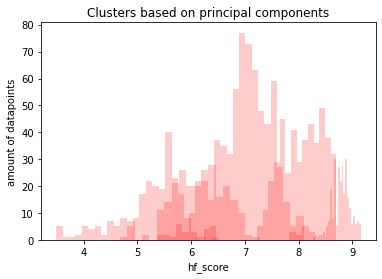

In [117]:
clusters = []

for x in range(0, CLUSTERS):
    clusters.append(processed_dataset[processed_dataset['label'] == x])
    
    plt.xlabel('hf_score')
    plt.ylabel('amount of datapoints')
    plt.title('Clusters based on principal components')
    plt.hist(clusters[x]['hf_score'], bins=25, color=(1, 0, 0, 0.20))

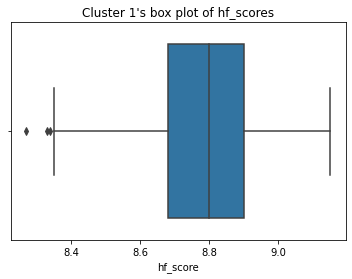

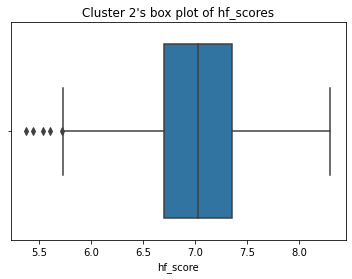

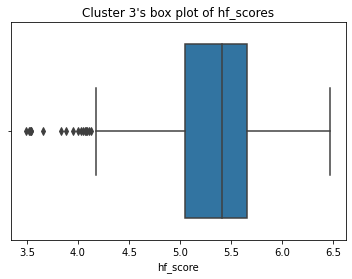

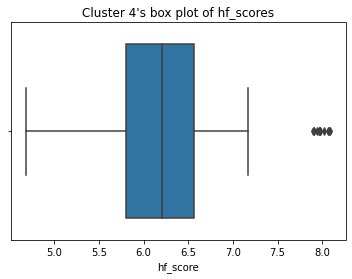

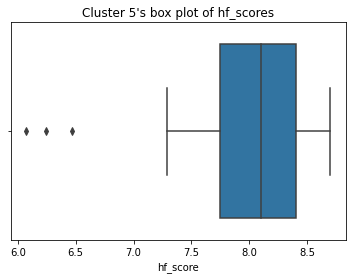

<Figure size 432x288 with 0 Axes>

In [118]:
for x in range(0, CLUSTERS):
    clustersdf = pd.DataFrame(clusters[x])
    sns.boxplot(data=clustersdf, x="hf_score")
    plt.title('Cluster ' + str(x+1) + '\'s box plot of hf_scores')
    plt.figure()

We see that some clusters such as 1 and 2 are similar to each other. Meanwhile some clusters such as 4 and 5 are disimilar. 

We will now be using Support Vector Regression to identify the patterns in the different **hf_scores** for each cluster. We want to find out which components in each cluster affect it the most and by how much. To simplify things, we will use the linear model for SVR. 

In [119]:
from sklearn.svm import LinearSVR

The snippet below extracts all the coefficients as well as the bias term.

In [120]:
model = []

for c in range(0, CLUSTERS):
    clust = clusters[c]

    svm = LinearSVR(verbose=True)
    svm.max_iter = 9750
    svm.fit(X=clust[[x for x in range(0, kept_components)]], y=clust['hf_score'])
    
    model.append((svm.coef_, svm.intercept_))

model

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\Andrei\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Andrei\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[(array([-0.23612349, -0.06179687, -0.06287958, -0.03397039, -0.0088854 ,
          0.00484537,  0.03742938,  0.0013293 ]),
  array([7.38185555])),
 (array([-0.22762538, -0.08293134, -0.06087325,  0.02909167,  0.0059143 ,
          0.05462561, -0.01819805, -0.0931464 ]),
  array([7.19702985])),
 (array([-0.20455594, -0.12723402, -0.02531934, -0.0714802 ,  0.02451276,
          0.0148141 , -0.05852306, -0.07046345]),
  array([6.71720629])),
 (array([-0.24403262, -0.08777181, -0.12445545, -0.01313596, -0.06979666,
          0.01302835,  0.14462192, -0.11113091]),
  array([7.05631776])),
 (array([-0.25898231, -0.02328838, -0.03969215,  0.0399621 , -0.0249703 ,
         -0.02485439,  0.02182586, -0.01799266]),
  array([7.28525577]))]

We can then reverse the PCA and get the weights for each feature like so.

In [121]:
postprocessed_model = []
for (coeffs, intercept) in model:
    c = coeffs.dot(pca_df)
    postprocessed_model.append((c, intercept))

postprocessed_model

[(array([ 0.03943648,  0.05080622,  0.04239143,  0.04649461,  0.0479371 ,
          0.06263224,  0.05595258,  0.05994317,  0.06070747,  0.05827675,
          0.05258413,  0.05614561, -0.01608078,  0.01321169, -0.03983729,
          0.0629131 ,  0.0443091 ,  0.03474017,  0.02805112,  0.02724188,
          0.0345649 ,  0.02346718,  0.01464843, -0.01528966, -0.01739017,
         -0.05289865, -0.02759987,  0.0144373 , -0.0264579 ,  0.03538517,
         -0.02705817, -0.01313303, -0.03166502, -0.01371084, -0.02714086,
         -0.02147722,  0.02673332,  0.04065399,  0.01295236,  0.01278648,
          0.00051352, -0.02460825, -0.01789344,  0.0238593 , -0.00498104,
          0.00550178, -0.01395551, -0.04370347,  0.029434  ,  0.04586572,
          0.01451199, -0.02062698]),
  array([7.38185555])),
 (array([ 3.21637120e-02,  6.87686739e-02,  7.76573727e-02,  7.82416621e-02,
          5.39992249e-02,  5.24654890e-02,  5.69192174e-02,  4.59810105e-02,
          3.95782410e-02,  6.21200636e-02,  2

Since each feature has been standardized, we can use these coefficients to determine how much a certain feature contributes to predicting the **hf_score**. Hence, we will answer the question of how certain features affect the **hf_score**.

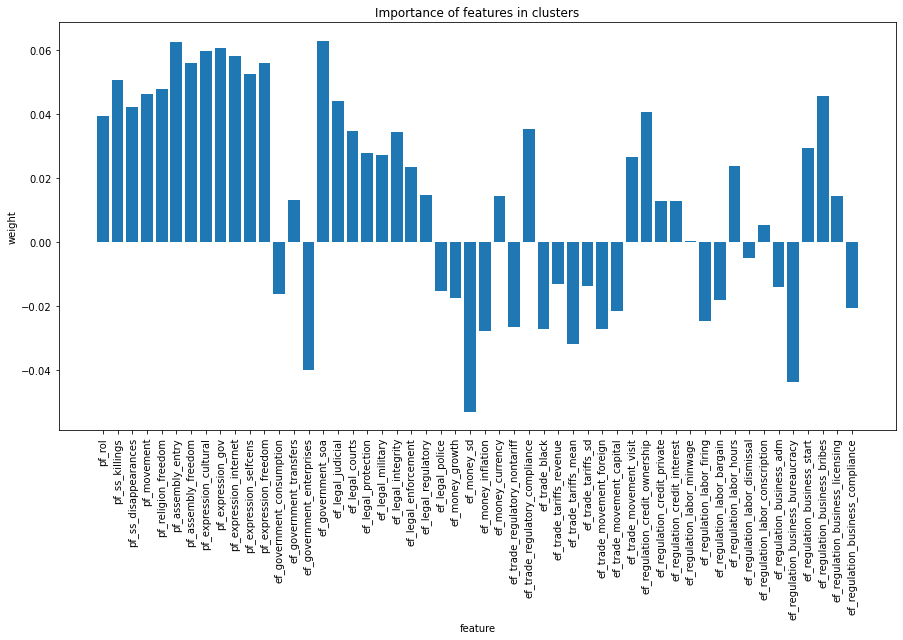

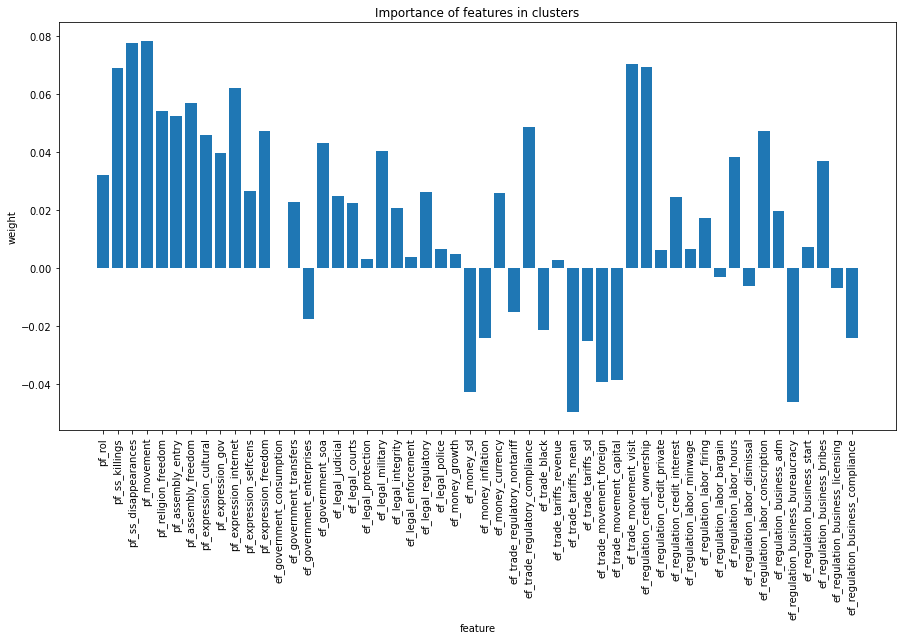

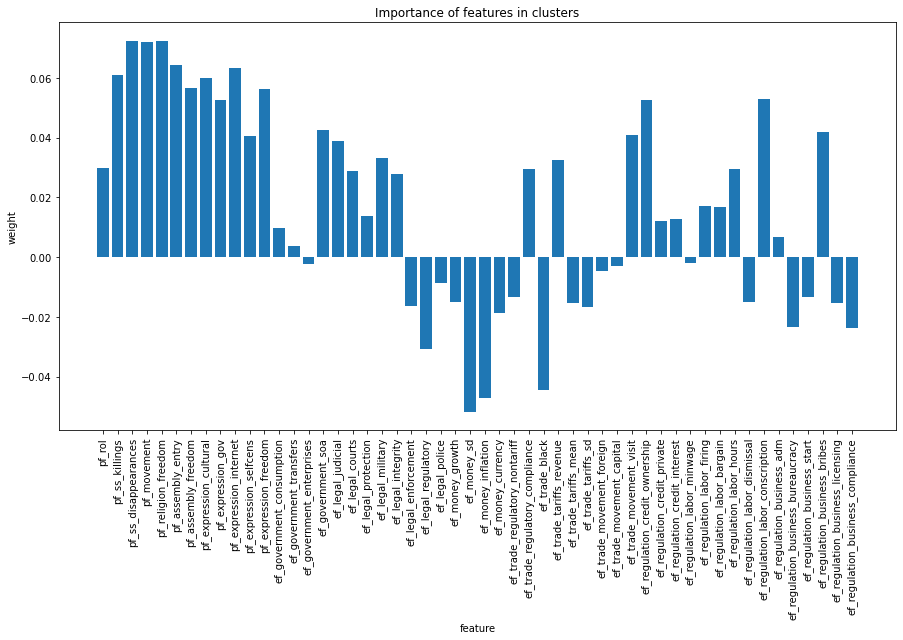

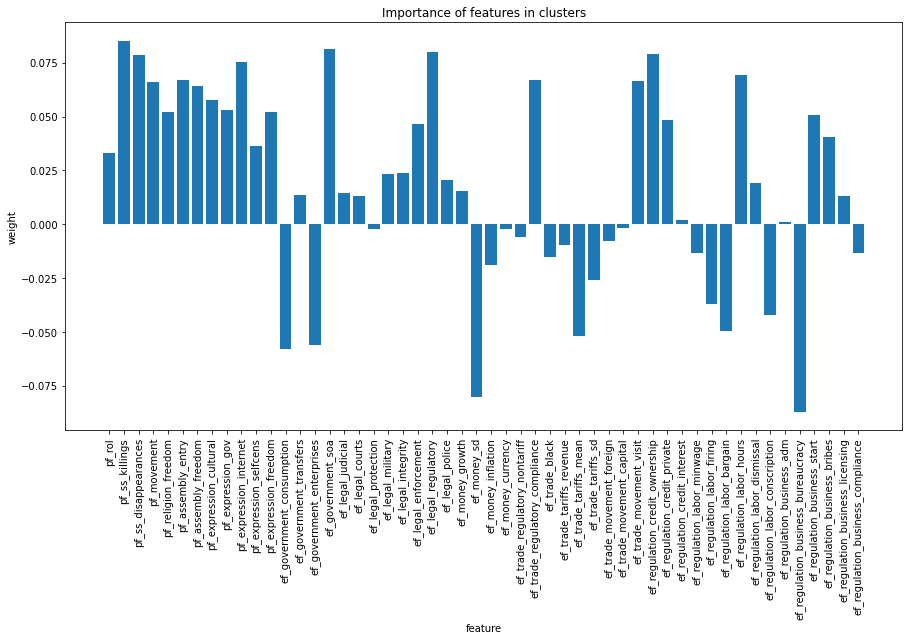

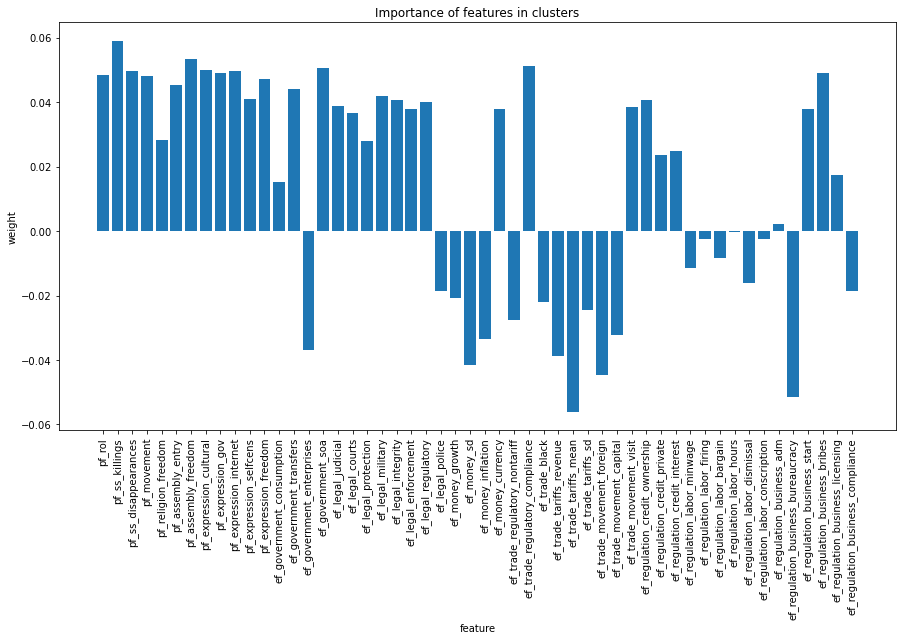

In [122]:

for m in postprocessed_model: 
    plt.figure(figsize= (15, 7.5))
    plt.xlabel('feature')
    plt.ylabel('weight')
    plt.xticks(rotation=90)
    plt.title('Importance of features in clusters')

    plt.bar([x for x in pf_ef_features], m[0])